<a href="https://colab.research.google.com/github/datascience-universe/desertion-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HABILITAR PARA TRABAJO LOCAL QUITANDO LOS SIMBOLOS (#)


In [ ]:
#HABILITAR ESTE COMANDO PARA TRABAJAR LOCALMENTE
#import pandas as pd
#df = pd.read_excel('db.xlsx')

### HABILITAR PARA TRABAJO EN GOOGLE COLAB QUITANDO LOS SIMBOLOS #

**# PASO INICIAL PARA MONTAR LA UNIDAD DE GOOGLE DRIVE (UBICACION DE DOCUMENTOS EN LA UNIDAD)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
excel_path = '/content/drive/MyDrive/Projecto/Data/BD2.xlsx'
#excel_path2 = '/content/drive/MyDrive/Projecto/Data/BD2.xlsx'
#repo = '/content/drive/MyDrive/Projecto/Colab_Notebooks/repository/edt/eda.py'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PROYECTO DE DESERCION**

### BLOQUE DE IMPORTACION DE PAQUETES






EXTERNOS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

INTERNOS

# ANALISIS EXPLORATORIO

CREACION DEL DATAFRAME

In [3]:
df = pd.read_excel(excel_path)
df.head(2)

,Codcli,PEM,NOMBRE_CARRERA,Tipo_Programa,Participacion_Curso_Induccion,Forma_Pago,Porc_Beca,Nivel_Cognitivo,Nivel_Instrumental,Nivel_Socioafectivo,Hom_Conv,Estado_Civil,Tramo_Renta,Cargo,Area_Trabajo,Ppal_Forma_Financiamiento,Conoc_IACC,Conoc_Plan_Estudios,Conoc_Perfil_Egreso,Anos_Ultimos_Estudios,Promedio_Media,Tipo_Establecimiento_Media,Entero_IACC,Conoc_PPT,Futuro_Profesional,confidence(No Desertor),confidence(Desertor),Etiqueta_Predicha,Etiqueta_Real,Marca,Edad_Contestar_Kat,Sexo_Kat,Estado_Civil_Kat,Tiene_Hijos_Kat,Nivel_estudios_padre_Kat,Nivel_estudios_madre_Kat,trabajo_remunerado_Kat,tramo_renta_Kat,cargo_Kat,area_trabaja_Kat,...,cuanto_sabe_plan_estudios_Kat,Cuanto_sabe_perfil_egreso_kat,Cuanto_sabe_empleabilidad_Kat,horario_conectarse_Kat,tiene_titulo_profesional_Kat,tiene_estudios_incompletos_Kat,años_ultima_vez_estudios_formales_Kat,año_egreso_enseñanza_media_Kat,promedio_enseñanza_media_Kat,tipo_establecimiento_media_Kat,como_entero_IACC_Kat,BD_programacion_Kat,Word_Kat,Excel_Kat,Presentaciones_PPT_Kat,Multimedia_Kat,apoyo_academico_Kat,futuro_profesional_kat,experiencia_E.S.,Ingreso al aula el estudiante,Participacion_1,Participacion_2,Participacion_3,Participacion_4,Participacion_5,Participacion_6,Participacion_7,Participacion_8,Participacion_9,Prom_part,Nota_1,Nota_2,Nota_3,Nota_4,Nota_5,Nota_6,Nota_7,Nota_8,Nota_9,Nota_prom
0,20203PCIAE065,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA EN ADMIN...,CONTINUIDAD,Participa en a lo menos una actividad,CONTADO,0.3,3. MEDIO,3. MEDIO,3. MEDIO,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533886,0.466114,No Desertor,No Desertor,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.2,8.85,9.0,8.4,8.35,8.50,7.85,8.65,26.0,6.5660
1,20203PCIND101,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA INDUSTRIAL,CONTINUIDAD,No ha participado,CHEQUE,0.3,NaN,NaN,NaN,SI,Casado,600.001 a 800.000,Asistente/Administrativo,Industrial,Recursos Propios.,Mucho,Poco,Poco,1 Año,4.5,Municipal,Google,Nivel Medio,Optar a un mejor cargo o sueldo en nuevo trabajo,0.774788,0.225212,No Desertor,No Desertor,x,38.0,Masculino,Casado,1 Hijo,Media,Media,SI,600.001 a 800.000,Asistente/Administrativo,Industrial,...,Poco,Poco,Nada,Entre las 18:00 a 23:00 horas.,SI,NO,1 Año,2001,4.5,Municipal,Google,Nivel Básico,Nivel Medio,Nivel Medio,Nivel Medio,Nivel Medio,Orientación Profesional.,Optar a un mejor cargo o sueldo en nuevo trabajo,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,9.00,8.5,9.0,9.00,8.75,9.00,9.00,27.5,6.8425


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Codcli                                 9405 non-null   object        
 1   PEM                                    9405 non-null   datetime64[ns]
 2   NOMBRE_CARRERA                         9405 non-null   object        
 3   Tipo_Programa                          9405 non-null   object        
 4   Participacion_Curso_Induccion          9319 non-null   object        
 5   Forma_Pago                             9248 non-null   object        
 6   Porc_Beca                              9248 non-null   float64       
 7   Nivel_Cognitivo                        7208 non-null   object        
 8   Nivel_Instrumental                     7208 non-null   object        
 9   Nivel_Socioafectivo                    6355 non-null   object  

TRAMIENTO DE LAS COLUMNAS

#Tratativa das colunas

In [5]:
def exploracion_de_datos(df):
    """funcion que toma por argumento el DataFrame y 
    genera un objeto de tipo DataFrame con detalles de 
    los datos agregando una columna llamada descripcion 
    donde se detallaran cada variable """

    
    columns = ['Variable','Tipo_variable','Valores_nulos','%_nulos' ,'Ejemplo', 'Definicion' ]
    definicion = ['' for i in range(len(df))]
    # Get the columns into a list
    variables = list(df.columns)
  
    # Iterate over each dtypes to get variables type []
    variable_type = [ 'Cualitativa' if col_type == 'object' else 'Numerica' if col_type == 'float64' else 'Hora-Fecha' if col_type == 'datetime64[ns]' else 'unknow' for col_type in df.dtypes ]
    
    # get nulls of every variable
    null_count = list(df.isnull().sum())

    # get nulls of every variable
    porcentaje_de_nulos = round(df.isnull().sum()*100 / len(df),0)
    porcentaje_de_nulos.astype('int32')
    # get value not null of a random row
    ejemplar_no_nulo = list(df[:1000].dropna(axis=0).iloc[0])
           
    # zip all the lists in to a master list and then convert into a DataFrame
    ejemplar = list(zip(variables,variable_type,null_count,porcentaje_de_nulos, ejemplar_no_nulo, definicion))

    # Initialize empty DataFrame: data
    general_data_frame = pd.DataFrame(ejemplar, columns=columns)
    
    #Export to Excel in Drive
    general_data_frame.to_excel('/content/drive/MyDrive/Projecto/Descripcion_de_datos.xlsx')

    # return 
    return general_data_frame




      

    

#Eliminar variables con valores nulos mayores a 30%

In [6]:
a_eliminar = ['Estado_Civil',
'Tramo_Renta',
'Cargo',
'Area_Trabajo',
'Ppal_Forma_Financiamiento',
'Conoc_IACC',
'Conoc_Plan_Estudios',
'Conoc_Perfil_Egreso',
'Anos_Ultimos_Estudios',
'Promedio_Media',
'Tipo_Establecimiento_Media',
'Entero_IACC',
'Conoc_PPT',
'Futuro_Profesional',
'confidence(No Desertor)',
'confidence(Desertor)',
'Etiqueta_Predicha',
'Marca']

In [7]:
df_simplificado1 = df.drop(a_eliminar, axis=1, inplace=False)
df_simplificado1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Codcli                                 9405 non-null   object        
 1   PEM                                    9405 non-null   datetime64[ns]
 2   NOMBRE_CARRERA                         9405 non-null   object        
 3   Tipo_Programa                          9405 non-null   object        
 4   Participacion_Curso_Induccion          9319 non-null   object        
 5   Forma_Pago                             9248 non-null   object        
 6   Porc_Beca                              9248 non-null   float64       
 7   Nivel_Cognitivo                        7208 non-null   object        
 8   Nivel_Instrumental                     7208 non-null   object        
 9   Nivel_Socioafectivo                    6355 non-null   object  

#Proceso para cambiar el nombre de variables

In [8]:
df_simplificado1.columns

Index(['Codcli', 'PEM', 'NOMBRE_CARRERA', 'Tipo_Programa',
       'Participacion_Curso_Induccion', 'Forma_Pago', 'Porc_Beca',
       'Nivel_Cognitivo', 'Nivel_Instrumental', 'Nivel_Socioafectivo',
       'Hom_Conv', 'Etiqueta_Real', 'Edad_Contestar_Kat', 'Sexo_Kat',
       'Estado_Civil_Kat', 'Tiene_Hijos_Kat', 'Nivel_estudios_padre_Kat',
       'Nivel_estudios_madre_Kat', 'trabajo_remunerado_Kat', 'tramo_renta_Kat',
       'cargo_Kat', 'area_trabaja_Kat', 'ppal_forma_financiamiento_Kat',
       'evaluo_otras_instituciones_Kat', 'ppal_institucion_evaluada_Kat',
       'evaluo_otras_modalidades_Kat', 'Cuanto_sabe_IACC_Kat',
       'Cuanto_sabe_modalidad_Kat', 'Cuanto_sabe_nivel_exigencia_Kat',
       'cuanto_sabe_plan_estudios_Kat', 'Cuanto_sabe_perfil_egreso_kat',
       'Cuanto_sabe_empleabilidad_Kat', 'horario_conectarse_Kat',
       'tiene_titulo_profesional_Kat', 'tiene_estudios_incompletos_Kat',
       'años_ultima_vez_estudios_formales_Kat',
       'año_egreso_enseñanza_media_Kat

In [9]:
# proceso de normalizacion de nombres de columnas
# se incluiran todas las vairables para cambiar la capitalizacion y convertiras en minusculas.

df_simplificado1.rename(columns={'Codcli': 'codcli', 
                   'NOMBRE_CARRERA': 'carrera', 
                   'Tipo_Programa': 'tipo_programa',
                   'Participacion_Curso_Induccion':'partic_curso_ind',
                   'Forma_Pago':'forma_pago',
                   'Porc_Beca':'%_beca',
                   'Nivel_Cognitivo': 'cognitivo',
                   'Nivel_Instrumental':'instrumental',
                   'Nivel_Socioafectivo':'socioafectivo',
                   'Hom_Conv':'hom_convalidadas', 
                   'Edad_Contestar_Kat': 'edad',
                   'Sexo_Kat': 'sexo',
                   'Estado_Civil_Kat': 'edo_civil',
                   'Tiene_Hijos_Kat': 'num_hijos',
                   'Nivel_estudios_padre_Kat': 'estud_padre',
                   'Nivel_estudios_madre_Kat': 'estud_madre',
                   'trabajo_remunerado_Kat': 'trab_remun',
                   'tramo_renta_Kat': 'tramo_renta',
                   'cargo_Kat': 'cargo',
                   'area_trabaja_Kat': 'area_trabajo',
                   'ppal_forma_financiamiento_Kat':'form_financ' ,
                   'evaluo_otras_instituciones_Kat': 'eval_otras_inst',

                   'ppal_institucion_evaluada_Kat': 'ppal_institucion_evaluada',
                   'evaluo_otras_modalidades_Kat': 'evaluo_otras_modalidades',
                   'Cuanto_sabe_IACC_Kat': 'sabe_sobre_IACC',
                   'Cuanto_sabe_modalidad_Kat': 'sabe_modalidad',
                   'Cuanto_sabe_nivel_exigencia_Kat': 'sabe_nivel_exigencia',
                   'cuanto_sabe_plan_estudios_Kat': 'sabe_plan_estudios',
                   'Cuanto_sabe_perfil_egreso_kat': 'sabe_perfil_egreso',
                   'Cuanto_sabe_empleabilidad_Kat': 'sabe_empleabilidad',
                   'horario_conectarse_Kat': 'horario_de_conex',
                   'tiene_titulo_profesional_Kat': 'titulo_prof',
                   'tiene_estudios_incompletos_Kat': 'estud_incompl',
                   'años_ultima_vez_estudios_formales_Kat': 'tiempo_sin_estudiar',
                   'año_egreso_enseñanza_media_Kat': 'ano_fin_secundaria',
                   'promedio_enseñanza_media_Kat': 'promedio_secundaria',
                   'tipo_establecimiento_media_Kat': 'tipo_insti_secundaria',
                   'como_entero_IACC_Kat': 'como_conoce_IACC',
                   'BD_programacion_Kat': 'sabe_programarBD',
                   'Word_Kat': 'sabe_word', 
                   'Excel_Kat': 'sabe_xlsx',
                   'Presentaciones_PPT_Kat': 'sabe_pptx',
                   'Multimedia_Kat': 'sabe_multimedia',
                   'apoyo_academico_Kat': 'apoyo_academico',
                   'futuro_profesional_kat': 'objeti_de_egreso',
                   'experiencia_E.S.': 'experiencia_E.S.',
                   'Ingreso al aula el estudiante': 'ingreso_al_aula',
                   'Participacion_1': 'partic_1sem',
                   'Participacion_2': 'partic_2sem',
                   'Participacion_3': 'partic_3sem',
                   'Participacion_4': 'partic_4sem',
                   'Participacion_5': 'partic_5sem',
                   'Participacion_6': 'partic_6sem',
                   'Participacion_7': 'partic_7sem',
                   'Participacion_8': 'partic_8sem',
                   'Participacion_9': 'partic_9sem',
                   'Prom_part': 'prom_partic',
                   'Nota_1': 'nota_1sem',
                   'Nota_2': 'nota_2sem',
                   'Nota_3': 'nota_3sem',
                   'Nota_4': 'nota_4sem',
                   'Nota_5': 'nota_5sem',
                   'Nota_6': 'nota_6sem',
                   'Nota_7': 'nota_7sem',
                   'Nota_8': 'nota_8sem',
                   'Nota_9': 'nota_9sem',
                   'Nota_prom': 'prom_nota',
                   }, inplace=True)

In [10]:
df_simplificado1.head()

,codcli,PEM,carrera,tipo_programa,partic_curso_ind,forma_pago,%_beca,cognitivo,instrumental,socioafectivo,hom_convalidadas,Etiqueta_Real,edad,sexo,edo_civil,num_hijos,estud_padre,estud_madre,trab_remun,tramo_renta,cargo,area_trabajo,form_financ,eval_otras_inst,ppal_institucion_evaluada,evaluo_otras_modalidades,sabe_sobre_IACC,sabe_modalidad,sabe_nivel_exigencia,sabe_plan_estudios,sabe_perfil_egreso,sabe_empleabilidad,horario_de_conex,titulo_prof,estud_incompl,tiempo_sin_estudiar,ano_fin_secundaria,promedio_secundaria,tipo_insti_secundaria,como_conoce_IACC,sabe_programarBD,sabe_word,sabe_xlsx,sabe_pptx,sabe_multimedia,apoyo_academico,objeti_de_egreso,experiencia_E.S.,ingreso_al_aula,partic_1sem,partic_2sem,partic_3sem,partic_4sem,partic_5sem,partic_6sem,partic_7sem,partic_8sem,partic_9sem,prom_partic,nota_1sem,nota_2sem,nota_3sem,nota_4sem,nota_5sem,nota_6sem,nota_7sem,nota_8sem,nota_9sem,prom_nota
0,20203PCIAE065,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA EN ADMIN...,CONTINUIDAD,Participa en a lo menos una actividad,CONTADO,0.3,3. MEDIO,3. MEDIO,3. MEDIO,SI,No Desertor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.2,8.85,9.0,8.4,8.35,8.50,7.85,8.65,26.0,6.5660
1,20203PCIND101,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA INDUSTRIAL,CONTINUIDAD,No ha participado,CHEQUE,0.3,NaN,NaN,NaN,SI,No Desertor,38.0,Masculino,Casado,1 Hijo,Media,Media,SI,600.001 a 800.000,Asistente/Administrativo,Industrial,Recursos Propios.,NO,No Evaluó otra institución,"No, no evalué otra Modalidad",Mucho,Mucho,Mucho,Poco,Poco,Nada,Entre las 18:00 a 23:00 horas.,SI,NO,1 Año,2001,4.5,Municipal,Google,Nivel Básico,Nivel Medio,Nivel Medio,Nivel Medio,Nivel Medio,Orientación Profesional.,Optar a un mejor cargo o sueldo en nuevo trabajo,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,9.00,8.5,9.0,9.00,8.75,9.00,9.00,27.5,6.8425
2,20203PCIAE011,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA EN ADMIN...,CONTINUIDAD,Participa en a lo menos una actividad,CHEQUE,0.3,3. MEDIO,4. MEDIO ALTO,4. MEDIO ALTO,SI,No Desertor,36.0,Masculino,Casado,Sin Hijos,Básica,Básica,SI,600.001 a 800.000,Supervisor,Administración/Comercio/Retail,Recursos Propios.,NO,No Evaluó otra institución,Evalué Modalidad Semipresencial,Poco,Mucho,Poco,Poco,Poco,Nada,Entre las 18:00 a 23:00 horas.,SI,NO,1 Año,1997,5.5,Particular Subvencionado,Google,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Orientación Profesional.,Mejorar cargo o remuneraciones en trabajo actual,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.6,8.35,9.0,9.0,8.80,9.00,8.60,8.65,27.5,6.8250
3,20203PCIPR331,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA EN PREVE...,CONTINUIDAD,Participa en a lo menos una actividad,PAGARÉ,0.3,NaN,NaN,NaN,NO,No Desertor,36.0,Masculino,Casado,2 Hiijos,Profesional,Profesional,SI,600.001 a 800.000,Supervisor,Educación,Recursos Propios.,SI,IPP,"No, no evalué otra Modalidad",Mucho,Mucho,Mucho,Mucho,Mucho,Mucho,Entre las 18:00 a 23:00 horas.,SI,SI,3 años,2000,5.8,Municipal,Publicidad en Televisión,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Orientación Profesional.,Optar a un mejor cargo o sueldo en nuevo trabajo,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,8.75,8.9,9.0,8.70,7.10,8.00,9.00,25.5,6.2965
4,20203PCIPR112,2020-03-31,PROGRAMA DE CONTINUIDAD EN INGENIERÍA EN PREVE...,CONTINUIDAD,Participa en a lo menos una actividad,CHEQUE,0.3,3. MEDIO,3. MEDIO,4. MEDIO ALTO,NO,No Desertor,38.0,Masculino,Casado,2 Hiijos,Media,Media,SI,800.001 a 1.000.000,Asistente/Administrativo,Fuerzas Armadas y de Orden,Recursos Propios.,SI,IPLACEX,"No, no evalué otra Modalidad",Poco,Poco,Mucho,Poco,Poco,Poco,Entre las 23:00 a 02:00 horas.,SI,NO,Menos de 1 Año,2000,5.5,Particul

In [11]:
df_simplificado1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   codcli                     9405 non-null   object        
 1   PEM                        9405 non-null   datetime64[ns]
 2   carrera                    9405 non-null   object        
 3   tipo_programa              9405 non-null   object        
 4   partic_curso_ind           9319 non-null   object        
 5   forma_pago                 9248 non-null   object        
 6   %_beca                     9248 non-null   float64       
 7   cognitivo                  7208 non-null   object        
 8   instrumental               7208 non-null   object        
 9   socioafectivo              6355 non-null   object        
 10  hom_convalidadas           9398 non-null   object        
 11  Etiqueta_Real              9405 non-null   object        
 12  edad  

In [12]:
# Verificacion del shape del DF
df_simplificado1.shape

(9405, 69)

In [13]:
def separacion_tipos_datos(df):
    """ Esta funcion retorna dos conjuntos de dataframes, el primer dataframe estara compuesto por variables categoricas
    y el segundo por numericas """
    
    df_categoricas = df_simplificado1.select_dtypes('object')
    df_numericas   = df_simplificado1.select_dtypes('number')
    
    return (df_categoricas,df_numericas)
    
    


In [39]:
df_categoricas,df_numericas =  separacion_tipos_datos(df_simplificado1)  

In [87]:
# Proceso de exploracion de variables
df_simplificado1.describe()

,%_beca,edad,promedio_secundaria,partic_1sem,partic_2sem,partic_3sem,partic_4sem,partic_5sem,partic_6sem,partic_7sem,partic_8sem,partic_9sem,prom_partic,nota_1sem,nota_2sem,nota_3sem,nota_4sem,nota_5sem,nota_6sem,nota_7sem,nota_8sem,nota_9sem,prom_nota
count,9245.000000,6646.000000,6646.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9191.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,9402.000000,8621.000000
mean,0.219717,33.964941,5.589738,0.884386,0.862600,0.849092,0.845547,0.824169,0.820357,0.805520,0.783557,0.774303,0.846728,6.672777,6.626138,6.538333,6.527888,6.486272,6.410973,6.505024,6.235288,19.592106,5.465654
std,0.055777,8.410596,0.453360,0.297640,0.322104,0.342501,0.350802,0.367551,0.372519,0.383086,0.396243,0.405862,0.312677,2.619809,2.810444,2.933972,2.937749,3.076585,3.090660,3.258039,3.311908,10.573937,1.723917
min,0.000000,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052500
25%,0.200000,28.000000,5.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.944444,6.000000,6.000000,5.950000,6.103750,6.250000,6.106250,6.115000,4.500000,14.000000,5.441100
50%,0.200000,33.000000,5.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.600000,7.750000,7.500000,7.750000,7.750000,7.750000,8.000000,7.850000,25.500000,6.156500
75%,0.250000,39.000000,5.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.500000,8.500000,8.625000,8.500000,8.500000,8.500000,8.750000,8.515000,26.500000,6.473250
max,1.000000,120.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,9.500000,9.000000,9.380000,9.000000,9.000000,28.000000,7.000000


In [38]:
# 20203TSRH207     2
# 20205TSCG002     2
# 20204INID027     2
# PPAL_INSTITUCION_EVALUADA 0                                2


for i in df_categoricas.columns:
    print(i.upper())
    print()
    
    print(pd.value_counts(df_categoricas[i]))
    print()
    print("Cantidad de valores nulos:  "+ str(df_categoricas[i].isna().sum()))
    print('------------')
    print()
    print()

CODCLI

20204INID027     2
20203TSRH207     2
20205TSCG002     2
20203INIF078     1
20203PCINF021    1
                ..
20203INIF024     1
20203TSCI118     1
20203TSTL054     1
20203TSLO038     1
20207PFPSI015    1
Name: codcli, Length: 9402, dtype: int64

Cantidad de valores nulos:  0
------------


CARRERA

TÉCNICO SUPERIOR EN ADMINISTRACIÓN DE EMPRESAS                            1159
INGENIERÍA INDUSTRIAL                                                      568
TÉCNICO DE NIVEL SUPERIOR EN CONTROL INDUSTRIAL                            557
PROGRAMA DE CONTINUIDAD EN INGENIERÍA EN PREVENCIÓN DE RIESGOS             507
TÉCNICO DE NIVEL SUPERIOR EN TRABAJO SOCIAL                                426
CONTABILIDAD GENERAL                                                       421
TÉCNICO DE NIVEL SUPERIOR EN AUTOMATIZACIÓN Y CONTROL                      378
TÉCNICO DE NIVEL SUPERIOR EN LOGÍSTICA                                     323
TÉCNICO DE NIVEL SUPERIOR EN RECURSOS HUMANOS          

Eliminar datos duplicados en la variable codcli (codigos que deben ser unicos)

In [17]:
#eliminar estudiante con el indice 5843

#df_simplificado1[df_simplificado1['codcli'] == '20203TSRH207']

df_simplificado1.drop(5843, inplace=True)

In [18]:
df_simplificado1[df_simplificado1['codcli'] == '20203TSRH207']

,codcli,PEM,carrera,tipo_programa,partic_curso_ind,forma_pago,%_beca,cognitivo,instrumental,socioafectivo,hom_convalidadas,Etiqueta_Real,edad,sexo,edo_civil,num_hijos,estud_padre,estud_madre,trab_remun,tramo_renta,cargo,area_trabajo,form_financ,eval_otras_inst,ppal_institucion_evaluada,evaluo_otras_modalidades,sabe_sobre_IACC,sabe_modalidad,sabe_nivel_exigencia,sabe_plan_estudios,sabe_perfil_egreso,sabe_empleabilidad,horario_de_conex,titulo_prof,estud_incompl,tiempo_sin_estudiar,ano_fin_secundaria,promedio_secundaria,tipo_insti_secundaria,como_conoce_IACC,sabe_programarBD,sabe_word,sabe_xlsx,sabe_pptx,sabe_multimedia,apoyo_academico,objeti_de_egreso,experiencia_E.S.,ingreso_al_aula,partic_1sem,partic_2sem,partic_3sem,partic_4sem,partic_5sem,partic_6sem,partic_7sem,partic_8sem,partic_9sem,prom_partic,nota_1sem,nota_2sem,nota_3sem,nota_4sem,nota_5sem,nota_6sem,nota_7sem,nota_8sem,nota_9sem,prom_nota
6743,20203TSRH207,2020-05-26,TÉCNICO DE NIVEL SUPERIOR EN RECURSOS HUMANOS,TÉCNICO,Participa en a lo menos una actividad,CHEQUE,0.25,4. MEDIO ALTO,2. MEDIO BAJO,NaN,NO,No Desertor,37.0,Femenino,Casado,3 o más Hijos,Media,Básica,NO,400.001 a 600.000,No trabaja,Otro,Recursos Propios.,SI,DUOC,Evalué Modalidad Presencial,Poco,Poco,Poco,Poco,Poco,Poco,Entre las 18:00 a 23:00 horas.,SI,SI,Entre 6 u 8 años,2001,5.7,Municipal,Mediante una persona conocida,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Orientación Profesional.,Trabajar de forma independiente.,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.665,7.0,6.75,8.75,9.0,7.5,9.0,9.0,28.0,6.48655


In [19]:
#eliminar estudiante con el indice 5843
# 20205TSCG002     2
# 20204INID027     2
df_simplificado1[df_simplificado1['codcli'] == '20205TSCG002']
df_simplificado1.drop(5862, inplace=True)

In [20]:
#eliminar estudiante con el indice 5843
# 20204INID027     2

df_simplificado1[df_simplificado1['codcli'] == '20204INID027']


,codcli,PEM,carrera,tipo_programa,partic_curso_ind,forma_pago,%_beca,cognitivo,instrumental,socioafectivo,hom_convalidadas,Etiqueta_Real,edad,sexo,edo_civil,num_hijos,estud_padre,estud_madre,trab_remun,tramo_renta,cargo,area_trabajo,form_financ,eval_otras_inst,ppal_institucion_evaluada,evaluo_otras_modalidades,sabe_sobre_IACC,sabe_modalidad,sabe_nivel_exigencia,sabe_plan_estudios,sabe_perfil_egreso,sabe_empleabilidad,horario_de_conex,titulo_prof,estud_incompl,tiempo_sin_estudiar,ano_fin_secundaria,promedio_secundaria,tipo_insti_secundaria,como_conoce_IACC,sabe_programarBD,sabe_word,sabe_xlsx,sabe_pptx,sabe_multimedia,apoyo_academico,objeti_de_egreso,experiencia_E.S.,ingreso_al_aula,partic_1sem,partic_2sem,partic_3sem,partic_4sem,partic_5sem,partic_6sem,partic_7sem,partic_8sem,partic_9sem,prom_partic,nota_1sem,nota_2sem,nota_3sem,nota_4sem,nota_5sem,nota_6sem,nota_7sem,nota_8sem,nota_9sem,prom_nota
6112,20204INID027,2020-04-28,INGENIERÍA INDUSTRIAL,PROFESIONAL,No ha participado,PAGARÉ,0.2,NaN,NaN,NaN,NO,Desertor,28.0,Masculino,Soltero.,Sin Hijos,Media,Media,SI,1.000.001 a 1.500.000,Supervisor,Minería,Beca / Financiamiento de Empresa donde trabaja,SI,INACAP,Evalué Modalidad Presencial,Poco,Poco,Poco,Poco,Poco,Poco,Entre las 18:00 a 23:00 horas.,NO,NO,1 Año,2008,5.8,Municipal,Mediante una persona conocida,Nivel Medio,Nivel Básico,Nivel Medio,Nivel Medio,Nivel Medio,Técnicas de estudio.,Mejorar cargo o remuneraciones en trabajo actual,Sí,No ingreso al aula en sus asignaturas,0.5,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.0,0.666667,4.0,8.25,4.0,6.8,5.5,3.75,4.125,2.625,0.0,2.7335
6205,20204INID027,2020-05-26,INGENIERÍA INDUSTRIAL,PROFESIONAL,No ha participado,PAGARÉ,0.2,NaN,NaN,NaN,NO,No Desertor,28.0,Masculino,Soltero.,Sin Hijos,Media,Media,SI,1.000.001 a 1.500.000,Supervisor,Minería,Beca / Financiamiento de Empresa donde trabaja,SI,INACAP,Evalué Modalidad Presencial,Poco,Poco,Poco,Poco,Poco,Poco,Entre las 18:00 a 23:00 horas.,NO,NO,1 Año,2008,5.8,Municipal,Mediante una persona conocida,Nivel Medio,Nivel Básico,Nivel Medio,Nivel Medio,Nivel Medio,Técnicas de estudio.,Mejorar cargo o remuneraciones en trabajo actual,Sí,No ingreso al aula en sus asignaturas,0.5,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.0,0.666667,4.0,8.25,4.0,6.8,5.5,3.75,4.125,2.625,0.0,2.7335


In [21]:
df_simplificado1.drop(6112, inplace=True)

In [22]:
# PPAL_INSTITUCION_EVALUADA 0                                2
ppal_institucion_evaluada = df_simplificado1['ppal_institucion_evaluada'] == 0
df_simplificado1.loc[ppal_institucion_evaluada]

,codcli,PEM,carrera,tipo_programa,partic_curso_ind,forma_pago,%_beca,cognitivo,instrumental,socioafectivo,hom_convalidadas,Etiqueta_Real,edad,sexo,edo_civil,num_hijos,estud_padre,estud_madre,trab_remun,tramo_renta,cargo,area_trabajo,form_financ,eval_otras_inst,ppal_institucion_evaluada,evaluo_otras_modalidades,sabe_sobre_IACC,sabe_modalidad,sabe_nivel_exigencia,sabe_plan_estudios,sabe_perfil_egreso,sabe_empleabilidad,horario_de_conex,titulo_prof,estud_incompl,tiempo_sin_estudiar,ano_fin_secundaria,promedio_secundaria,tipo_insti_secundaria,como_conoce_IACC,sabe_programarBD,sabe_word,sabe_xlsx,sabe_pptx,sabe_multimedia,apoyo_academico,objeti_de_egreso,experiencia_E.S.,ingreso_al_aula,partic_1sem,partic_2sem,partic_3sem,partic_4sem,partic_5sem,partic_6sem,partic_7sem,partic_8sem,partic_9sem,prom_partic,nota_1sem,nota_2sem,nota_3sem,nota_4sem,nota_5sem,nota_6sem,nota_7sem,nota_8sem,nota_9sem,prom_nota
3950,20203TSED195,2020-03-31,TÉCNICO DE NIVEL SUPERIOR EN EDUCACIÓN DIFEREN...,TÉCNICO,Participa en a lo menos una actividad,PAGARÉ,0.25,NaN,NaN,NaN,NO,No Desertor,27.0,Femenino,Soltero.,1 Hijo,Básica,Básica,SI,200.000 a 400.000,Profesional independiente/freelance,Educación,Recursos Propios.,SI,0,Evalué Modalidad Semipresencial,Poco,Poco,Poco,Poco,Poco,Poco,Entre las 23:00 a 02:00 horas.,SI,SI,2 Años,2010,4.7,Particular Subvencionado,Facebook,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Nivel Básico,Manejo computacional.,Trabajar de forma independiente.,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.5,7.25,6.5,6.5,8.500,5.500,8.000,9.000,25.5,5.8975
5704,20203TSCI318,2020-03-31,TÉCNICO DE NIVEL SUPERIOR EN CONTROL INDUSTRIAL,TÉCNICO,No ha participado,CHEQUE,0.25,NaN,NaN,NaN,NO,No Desertor,23.0,Masculino,Soltero.,Sin Hijos,Media,Media,SI,400.001 a 600.000,Asistente/Administrativo,Industrial,Recursos Propios.,NO,0,"No, no evalué otra Modalidad",Poco,Poco,Poco,Poco,Poco,Poco,Entre las 18:00 a 23:00 horas.,NO,NO,3 años,2016,5.0,Particular Subvencionado,Mediante una persona conocida,Nivel Medio,Nivel Medio,Nivel Medio,Nivel Medio,Nivel Medio,Técnicas de estudio.,Mejorar cargo o remuneraciones en trabajo actual,Sí,Ingreso al aula de todas sus asignaturas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,9.00,8.5,7.0,8.625,8.625,7.625,7.875,26.0,6.4575


In [23]:
# df.loc[df.ID == 103, ['FirstName', 'LastName']] = 'Matt', 'Jones'
df_simplificado1.loc[[3950,5704], 'ppal_institucion_evaluada'] = 'No Evaluó otra institución'





In [84]:
df_simplificado1.shape


(9402, 69)

In [89]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 306kB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [36]:
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df_simplificado1)
#display the report
advert_report.show_html('/content/drive/MyDrive/Projecto/Data/Advertising.html')



                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Projecto/Data/Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [34]:
#Convertir la variable ano_fin_secundaria en tipo de dato String

df_simplificado1['ano_fin_secundaria'] = df_simplificado1['ano_fin_secundaria'].astype(str)

In [43]:
tabla = pd.pivot_table(data=df_categoricas, values='codcli', index ='partic_curso_ind', columns=df_categoricas['Etiqueta_Real'], aggfunc='count')
print(tabla)




Etiqueta_Real                          Desertor  No Desertor
partic_curso_ind                                            
No ha participado                           249          691
Participa en a lo menos una actividad       831         7545


In [73]:
import numpy as np
import seaborn as sns
sns.set()
# Array com os não-sobreviventes, divididos em male e female
#bar_1 = tabla['No Desertor']
# Array com os sobreviventes, divididos em male e female
#bar_2 = tabla['Desertor']
# Range com a quantidade de itens das barras
#x_pos = np.arange(len(bar_1))

#first_bar = plt.bar(x_pos, bar_1, 0.5, color='b')
#second_bar = plt.bar(x_pos, bar_2, 0.5, color='y', bottom=bar_1)
# Definir posição e labels no eixo X


# tabla.div(tabla.sum(1), axis=0)
# tabla.plot(kind='bar', stacked=True, rot=0)
# plt.title("Participacion en curso de Inducción")
# plt.show()

tabla = pd.pivot_table(data=df_categoricas, values='codcli', index ='partic_curso_ind', columns=df_categoricas['Etiqueta_Real'], aggfunc='count')
print(tabla)

columns = df_simplificado1.drop('codcli', axis=1).columns





Etiqueta_Real                          Desertor  No Desertor
partic_curso_ind                                            
No ha participado                           249          691
Participa en a lo menos una actividad       831         7545


In [78]:
columns

Index(['PEM', 'carrera', 'tipo_programa', 'partic_curso_ind', 'forma_pago',
       '%_beca', 'cognitivo', 'instrumental', 'socioafectivo',
       'hom_convalidadas', 'Etiqueta_Real', 'edad', 'sexo', 'edo_civil',
       'num_hijos', 'estud_padre', 'estud_madre', 'trab_remun', 'tramo_renta',
       'cargo', 'area_trabajo', 'form_financ', 'eval_otras_inst',
       'ppal_institucion_evaluada', 'evaluo_otras_modalidades',
       'sabe_sobre_IACC', 'sabe_modalidad', 'sabe_nivel_exigencia',
       'sabe_plan_estudios', 'sabe_perfil_egreso', 'sabe_empleabilidad',
       'horario_de_conex', 'titulo_prof', 'estud_incompl',
       'tiempo_sin_estudiar', 'ano_fin_secundaria', 'promedio_secundaria',
       'tipo_insti_secundaria', 'como_conoce_IACC', 'sabe_programarBD',
       'sabe_word', 'sabe_xlsx', 'sabe_pptx', 'sabe_multimedia',
       'apoyo_academico', 'objeti_de_egreso', 'experiencia_E.S.',
       'ingreso_al_aula', 'partic_1sem', 'partic_2sem', 'partic_3sem',
       'partic_4sem', 'partic_

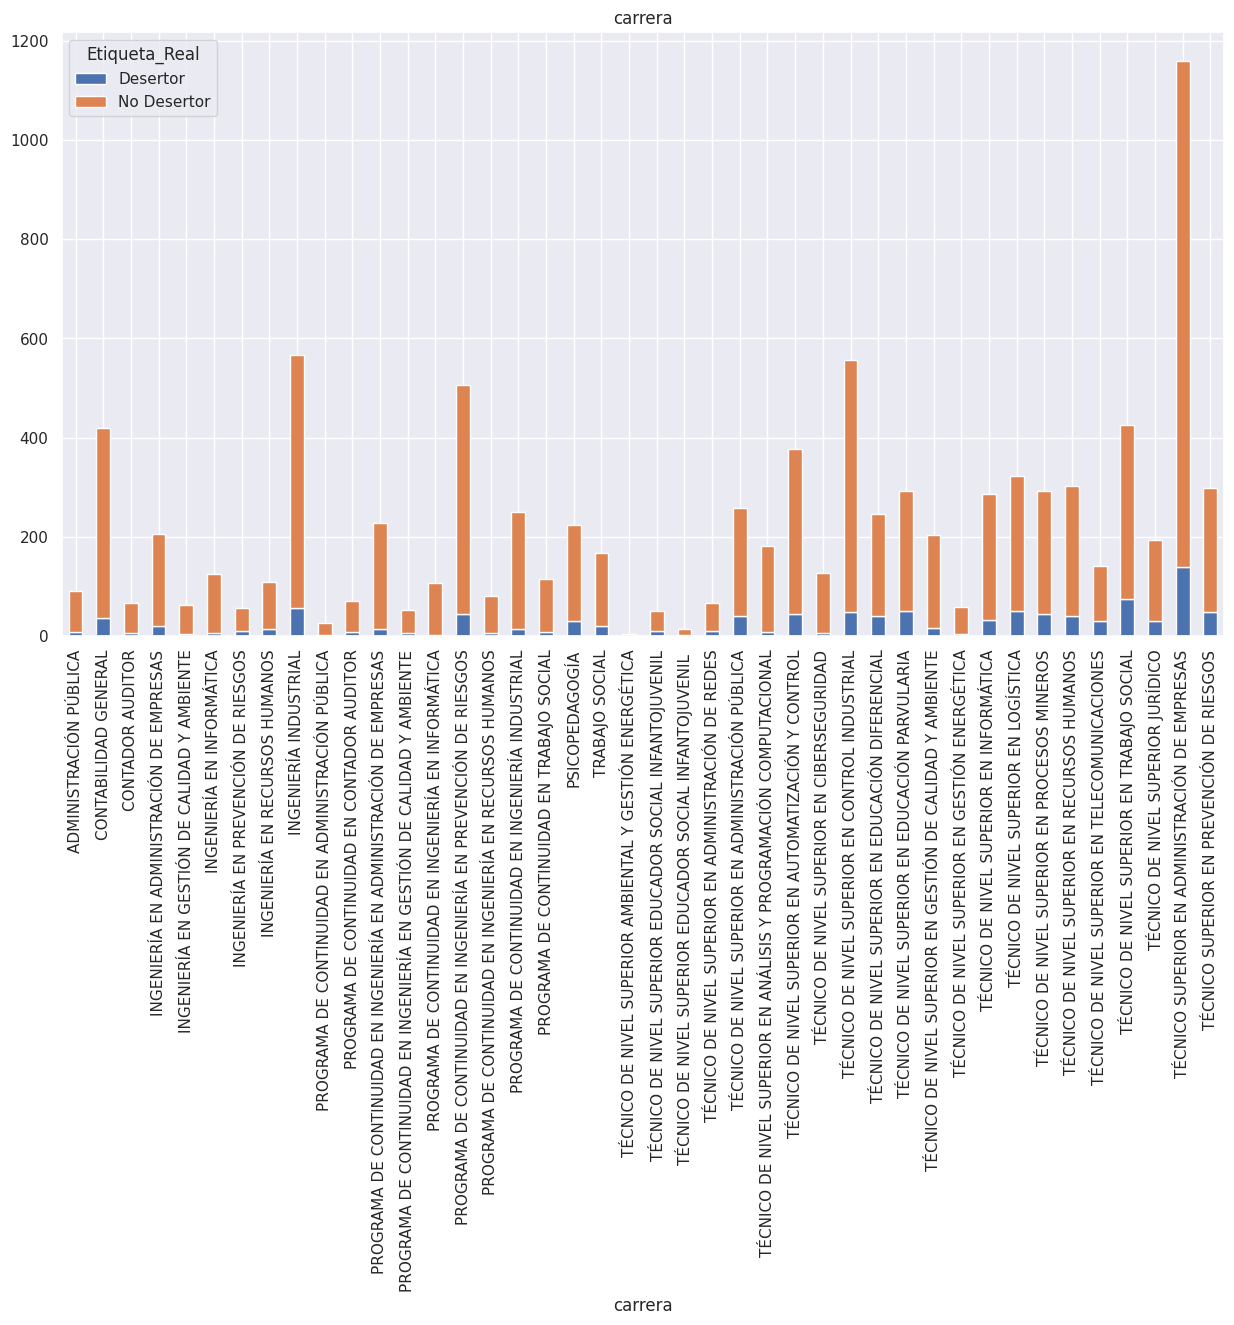

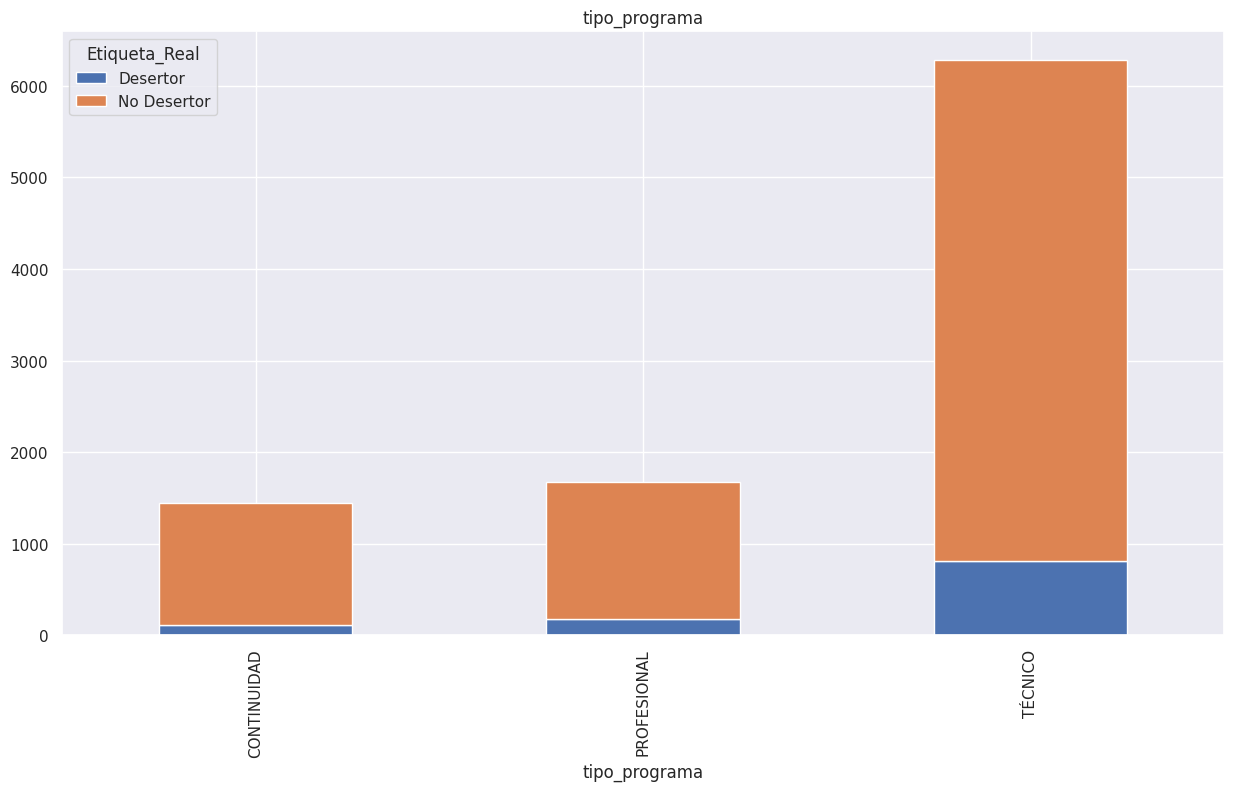

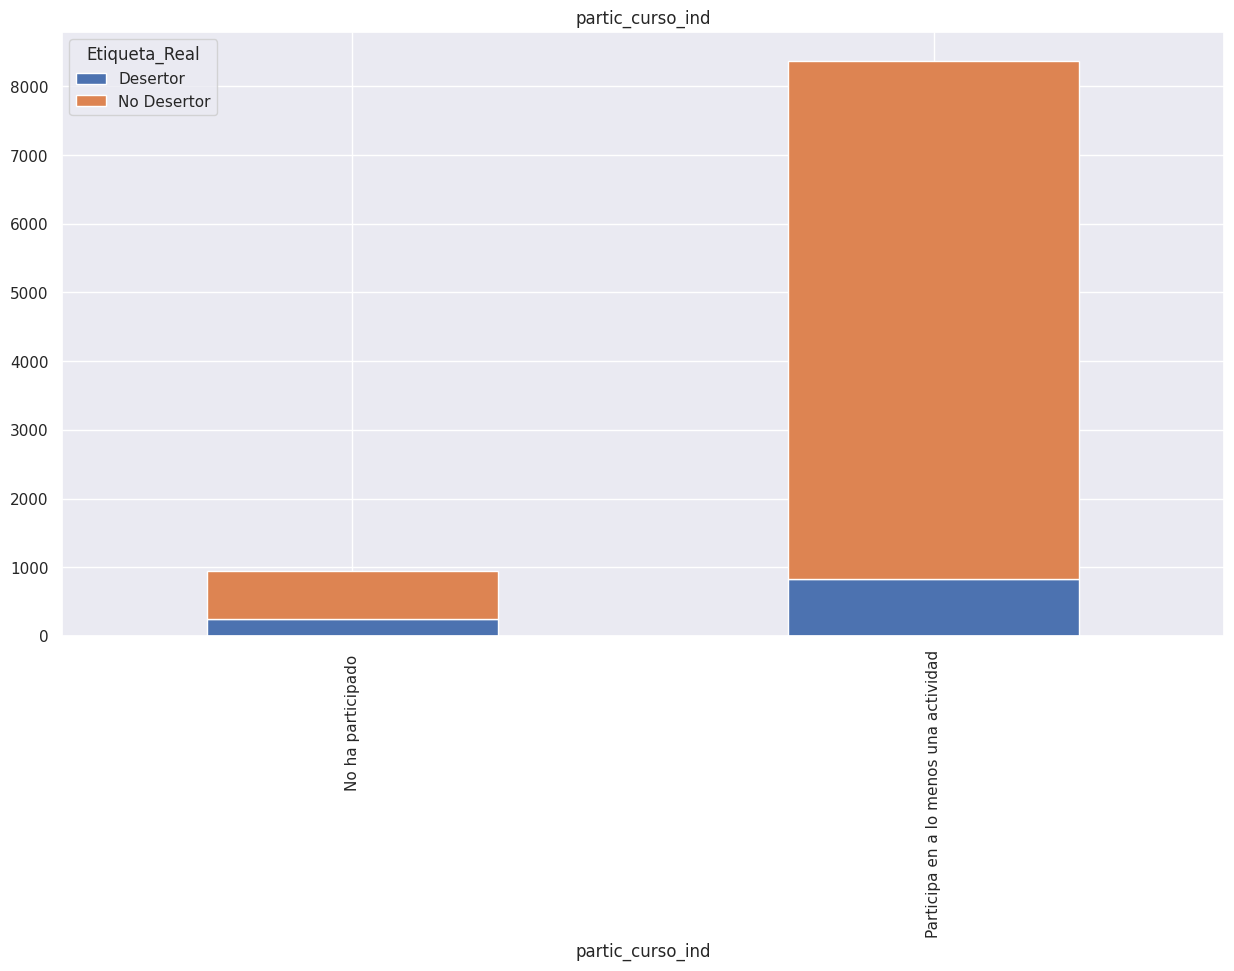

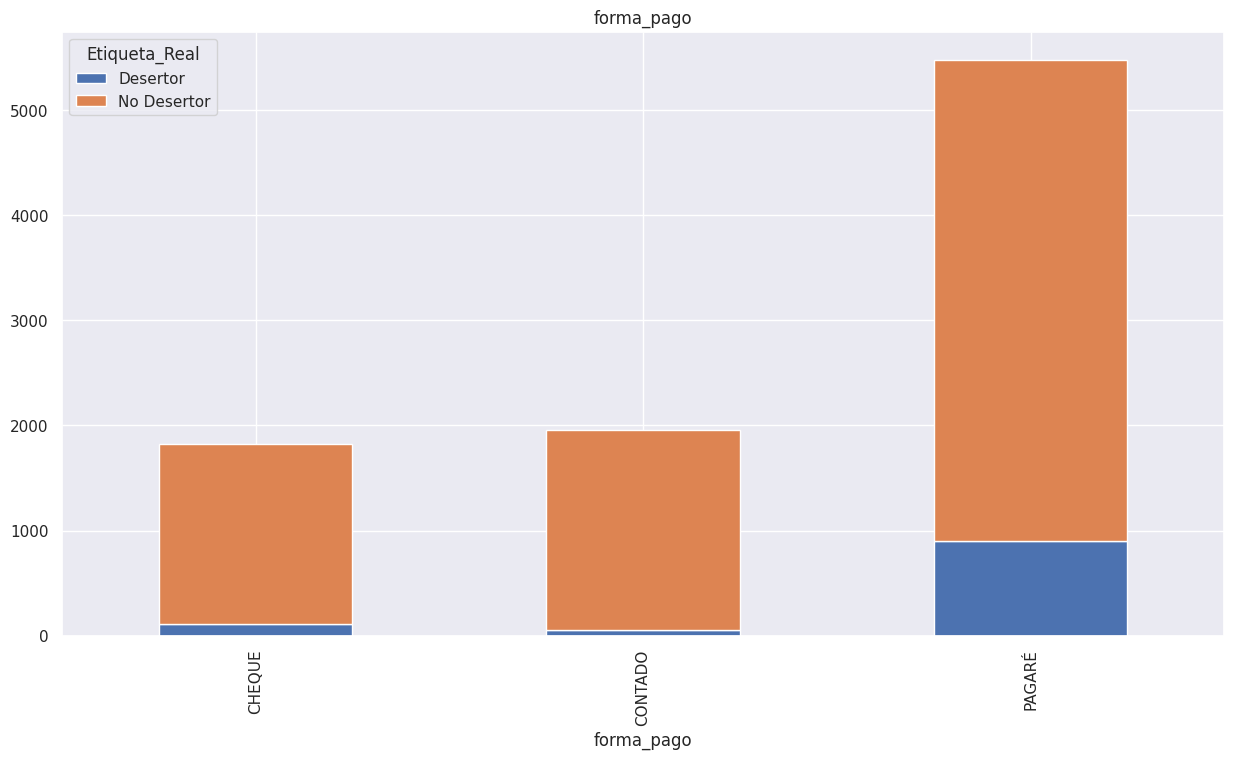

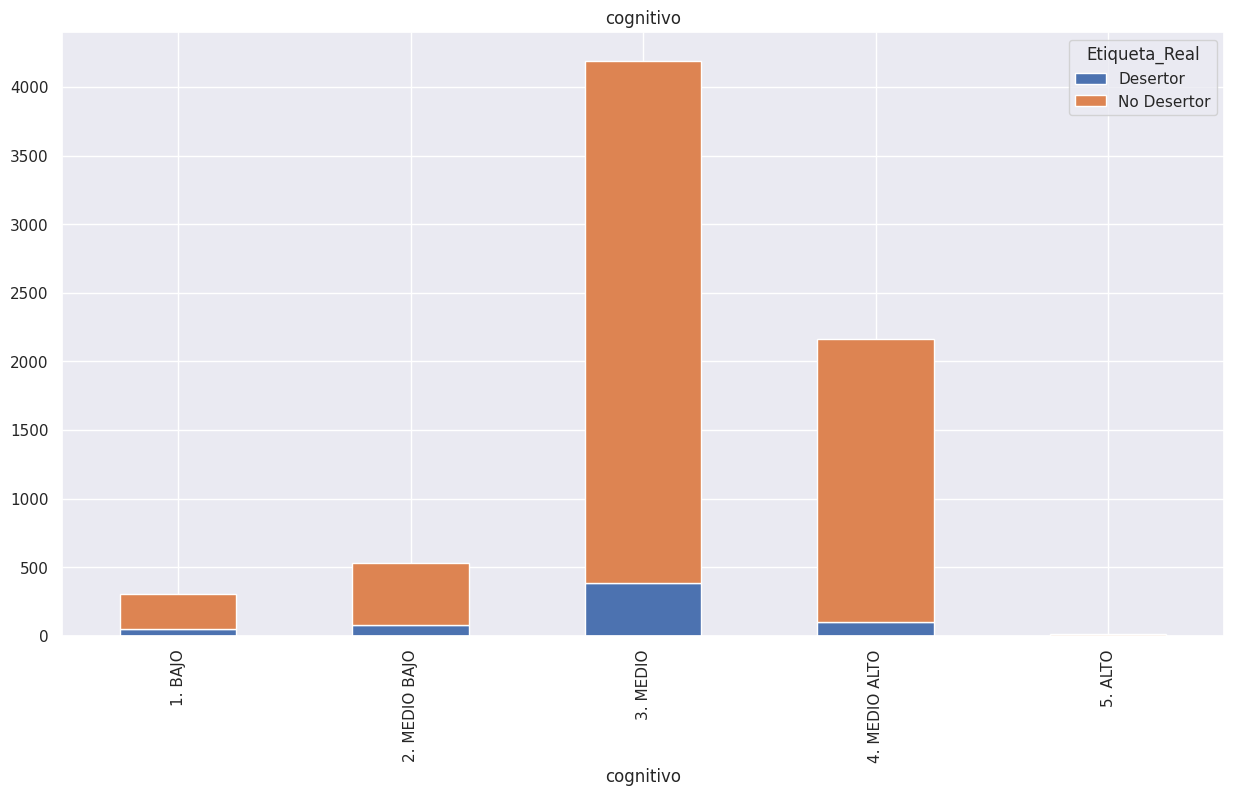

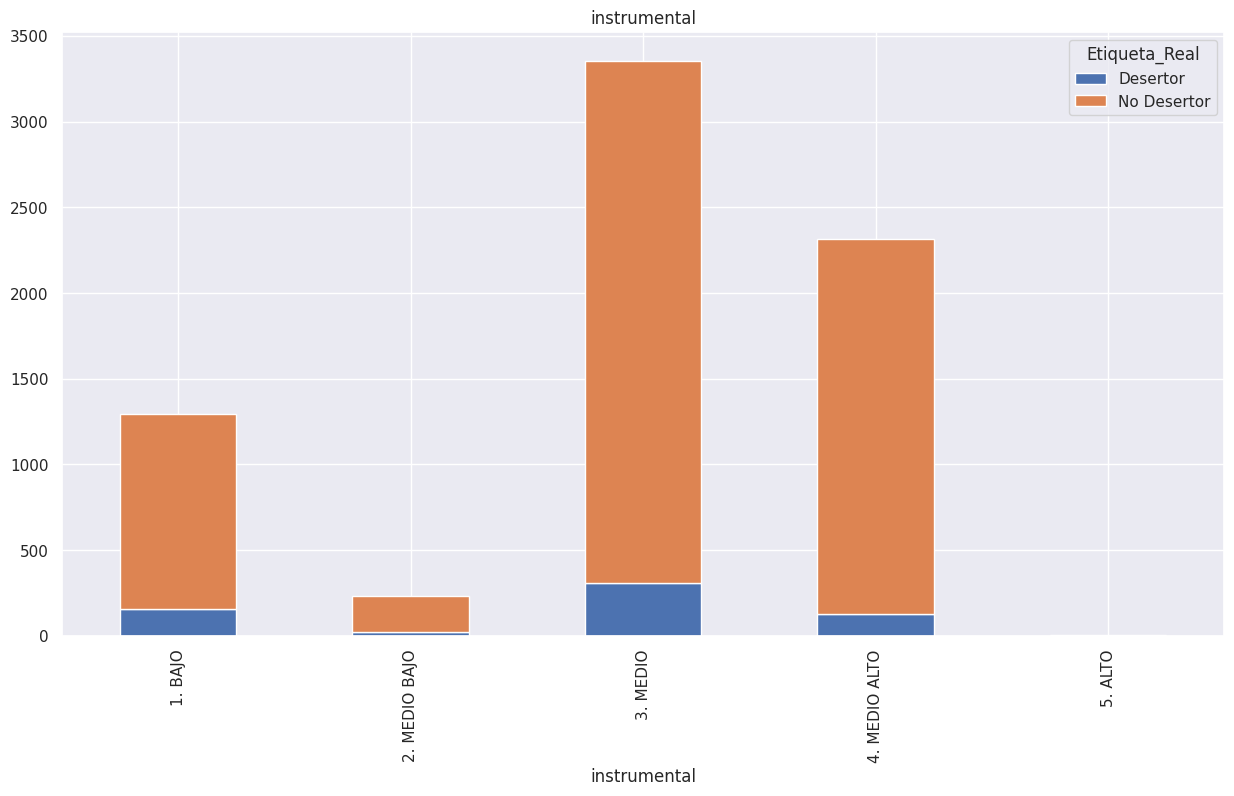

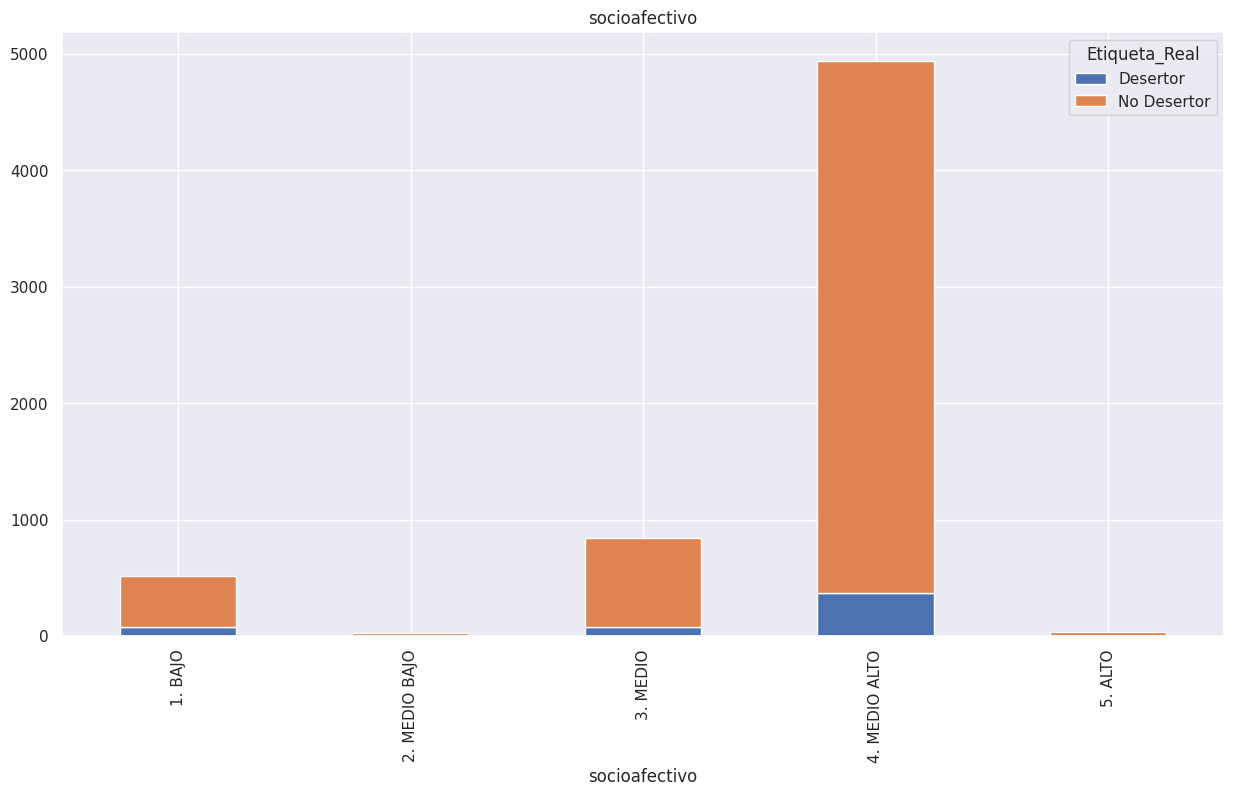

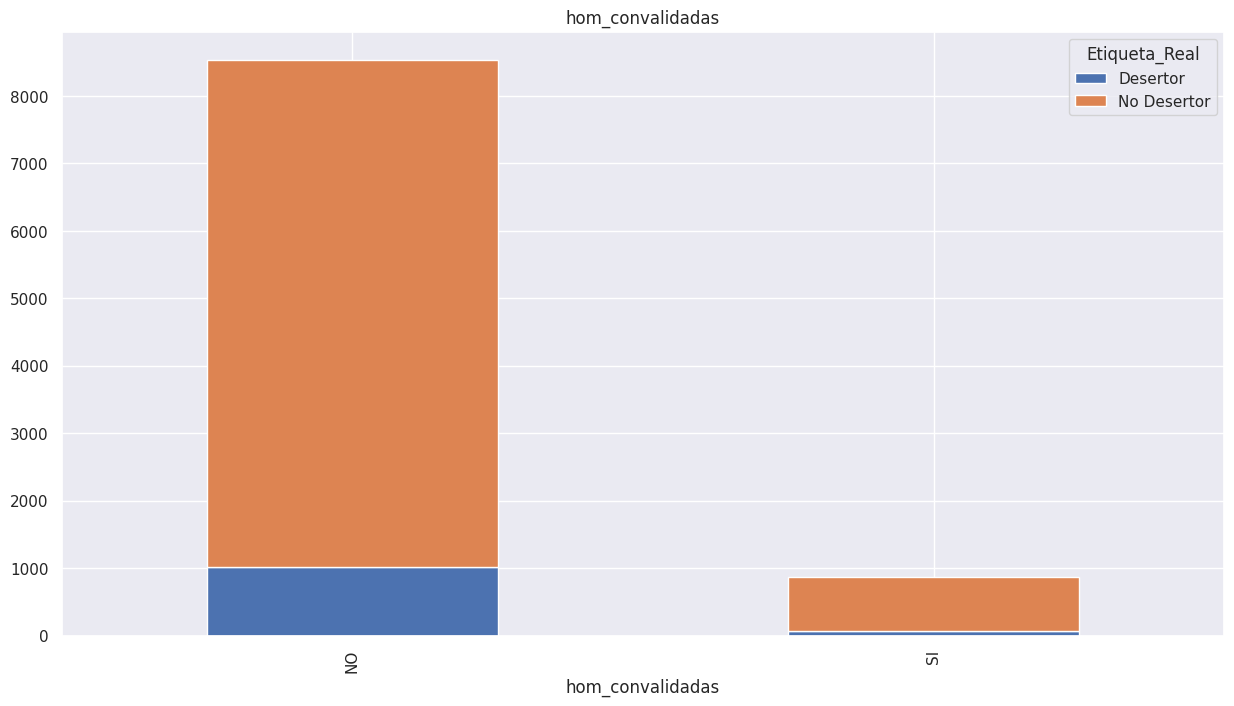

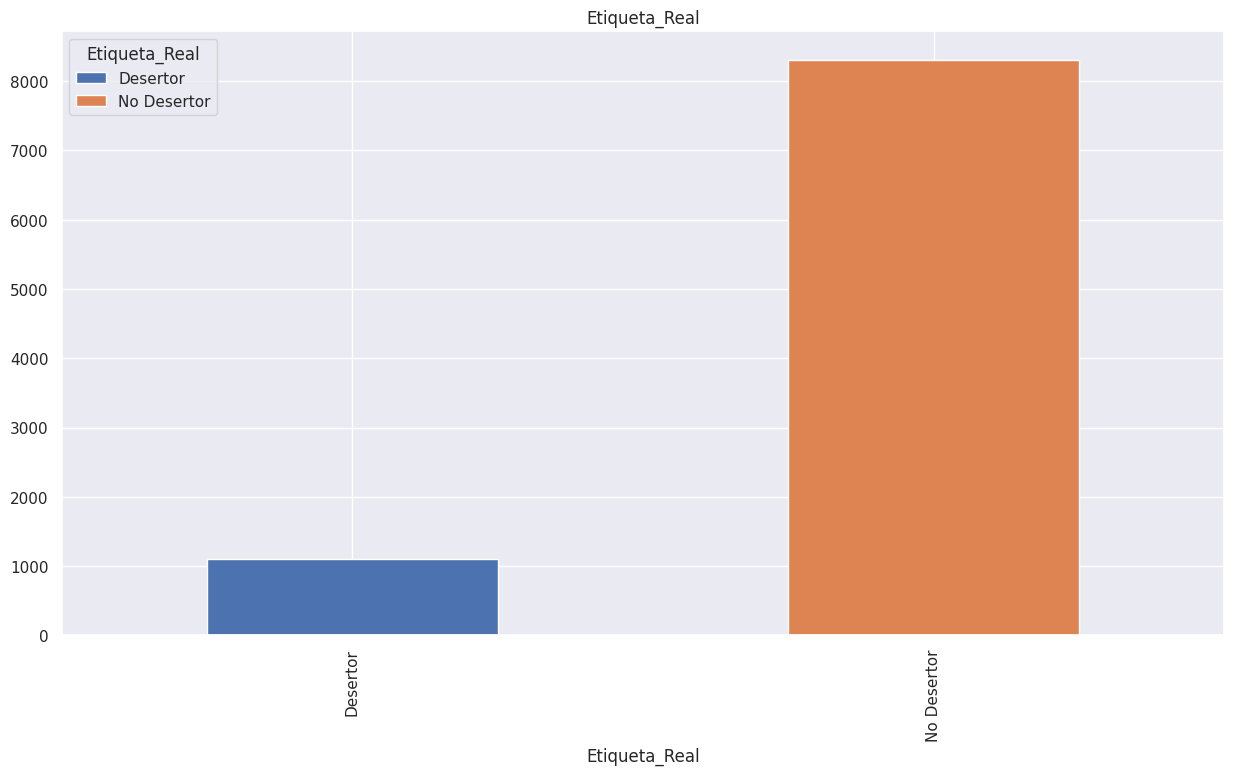

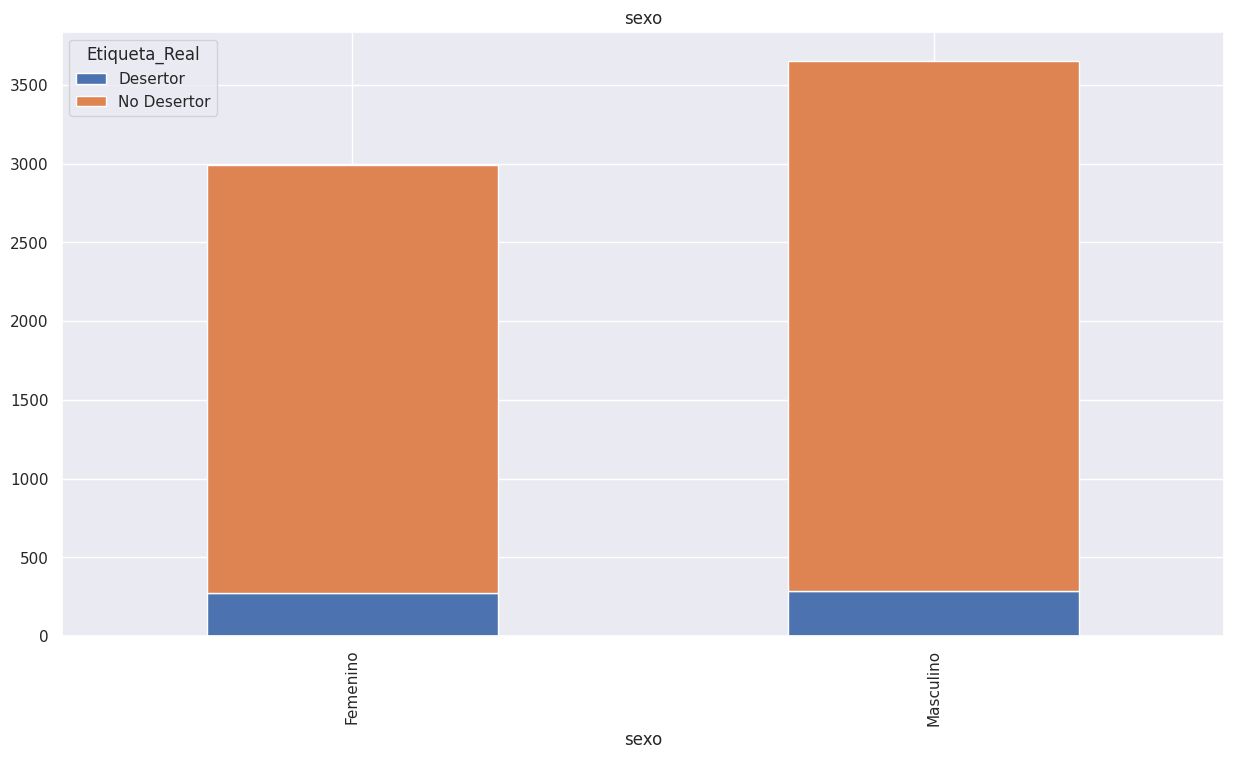

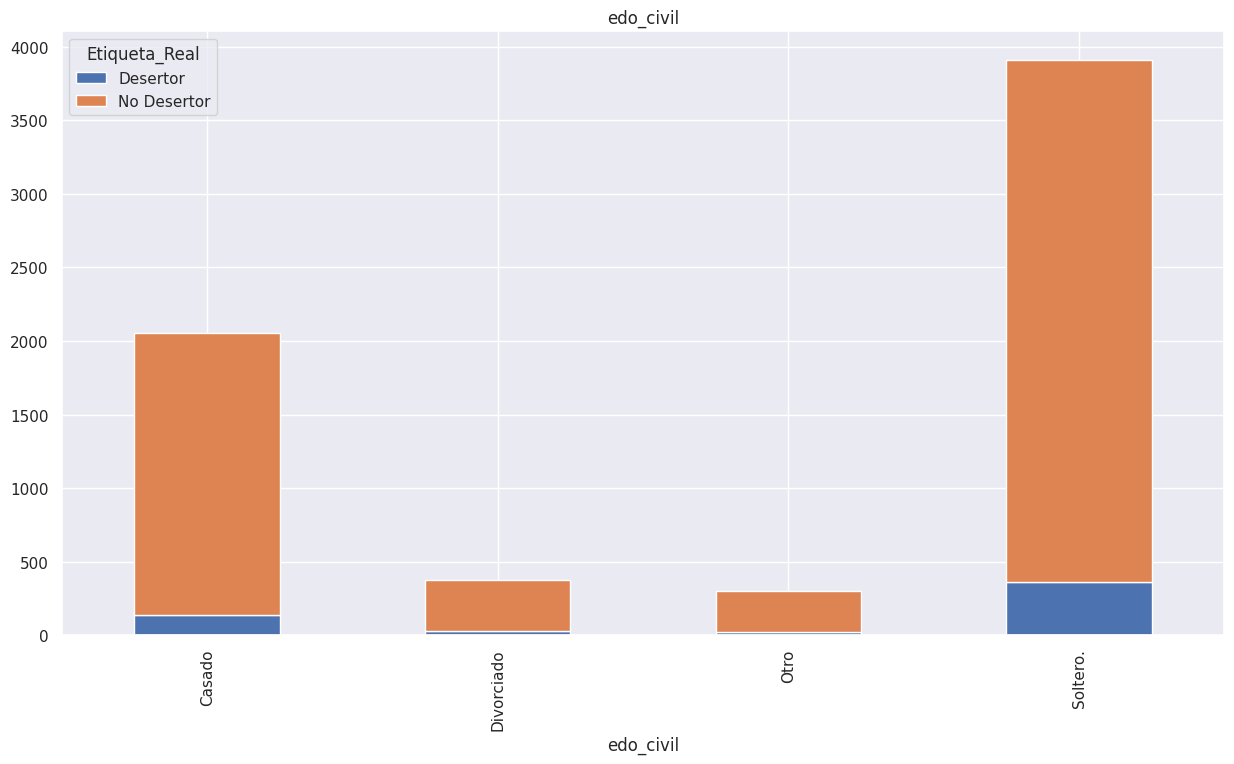

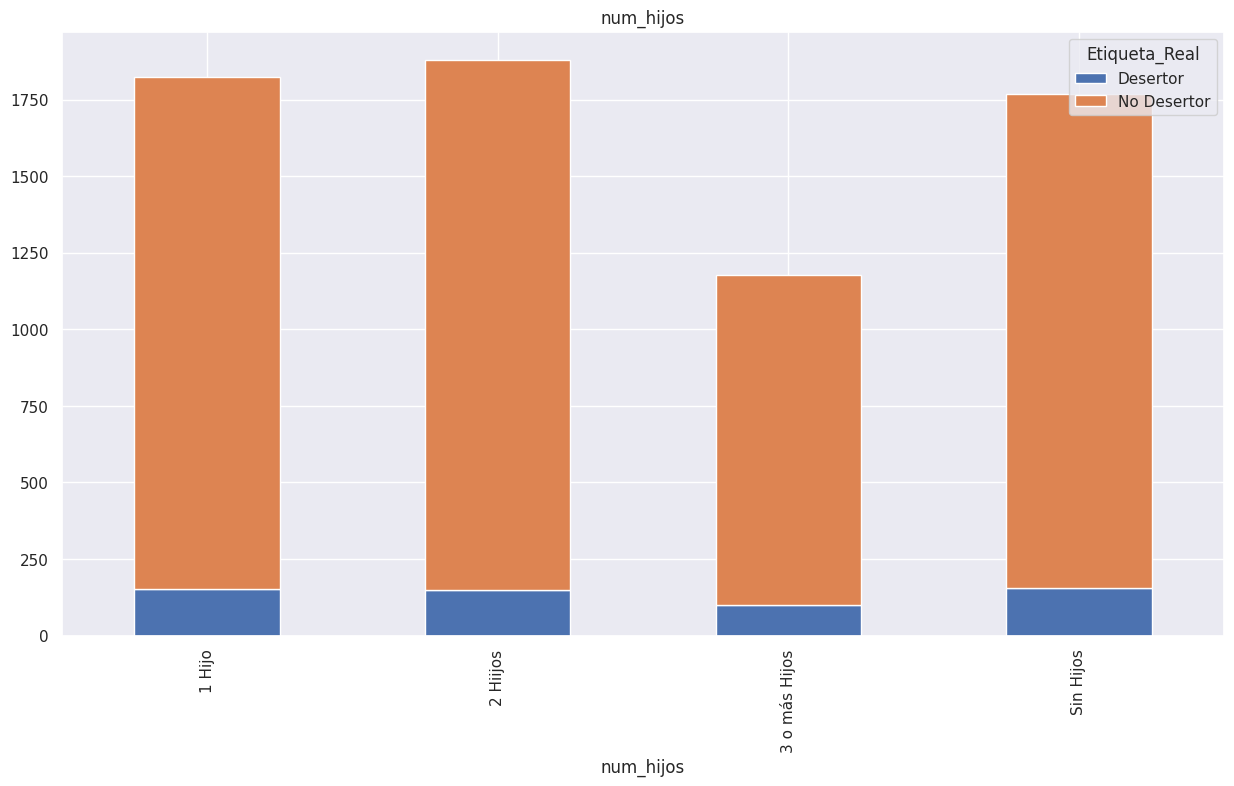

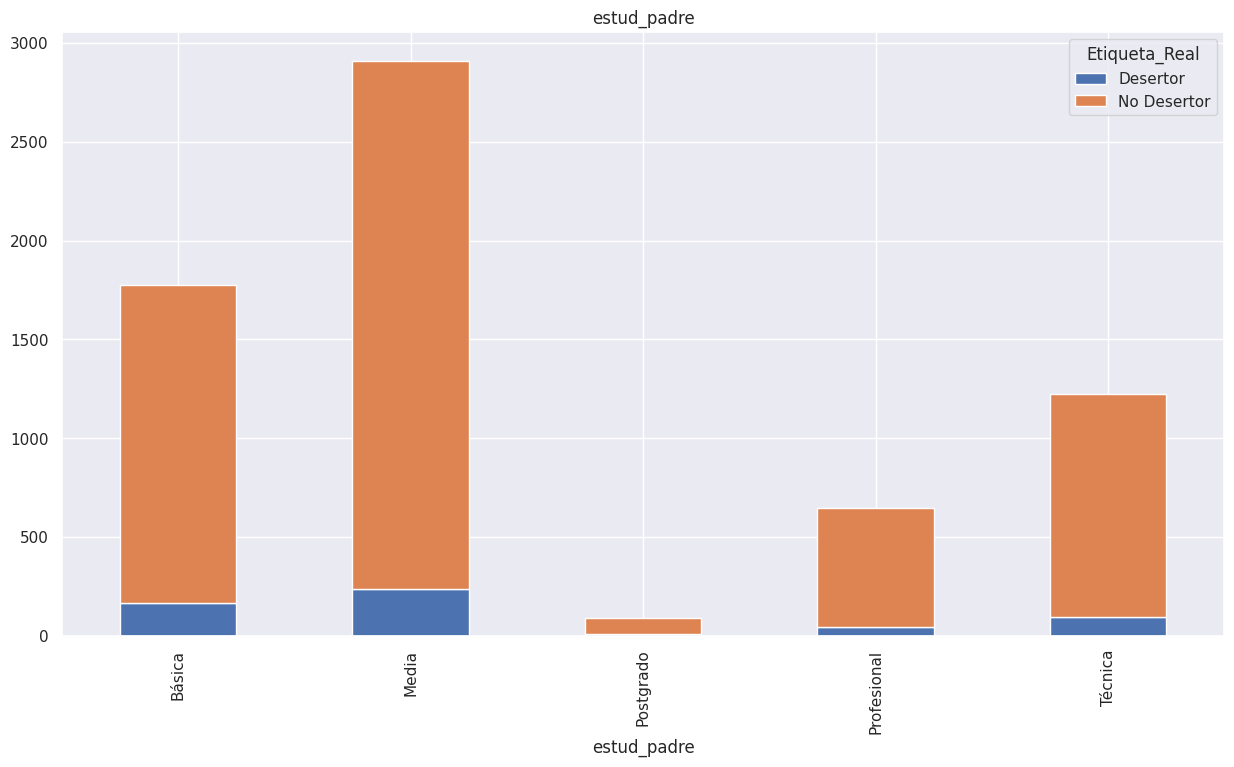

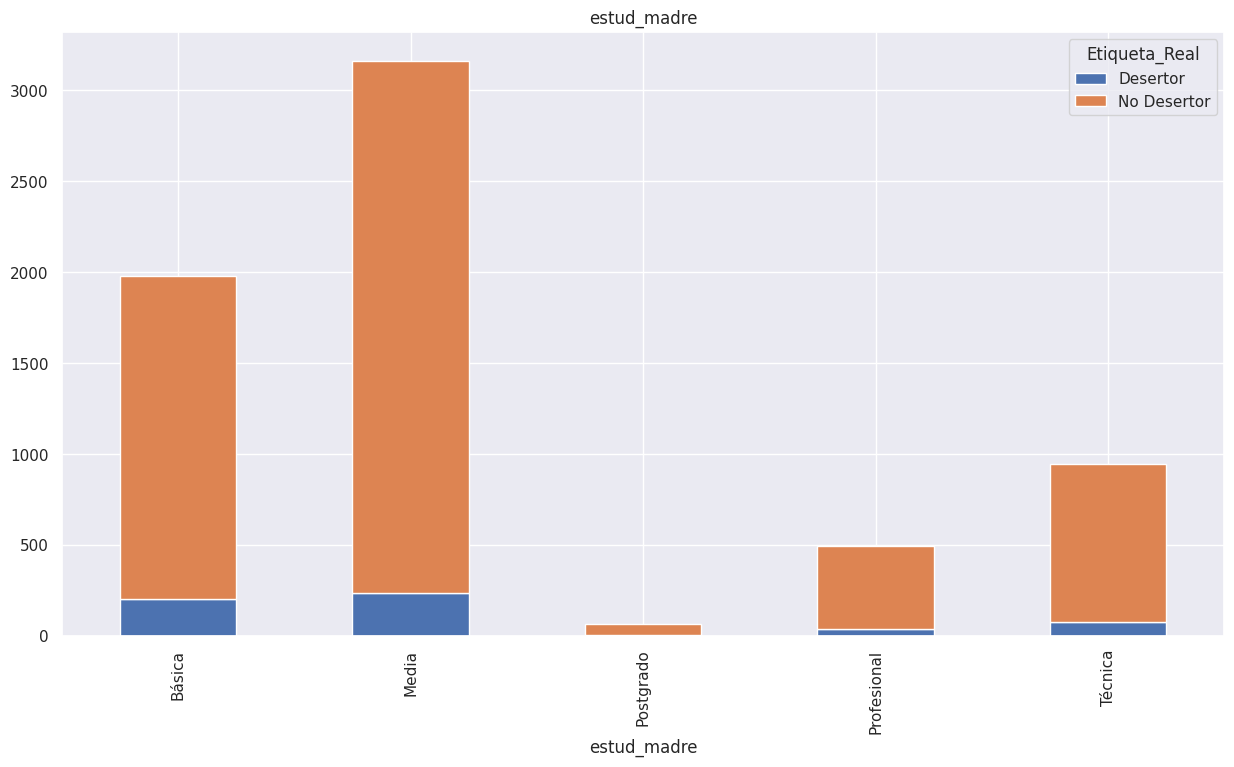

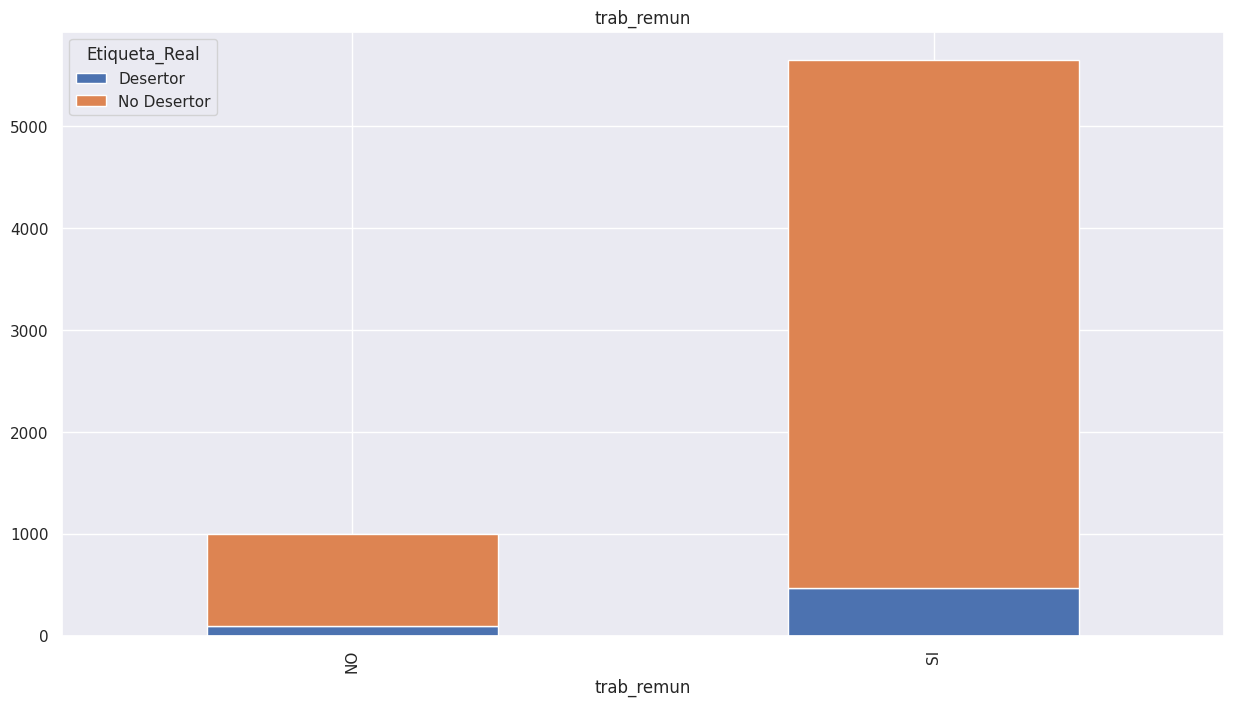

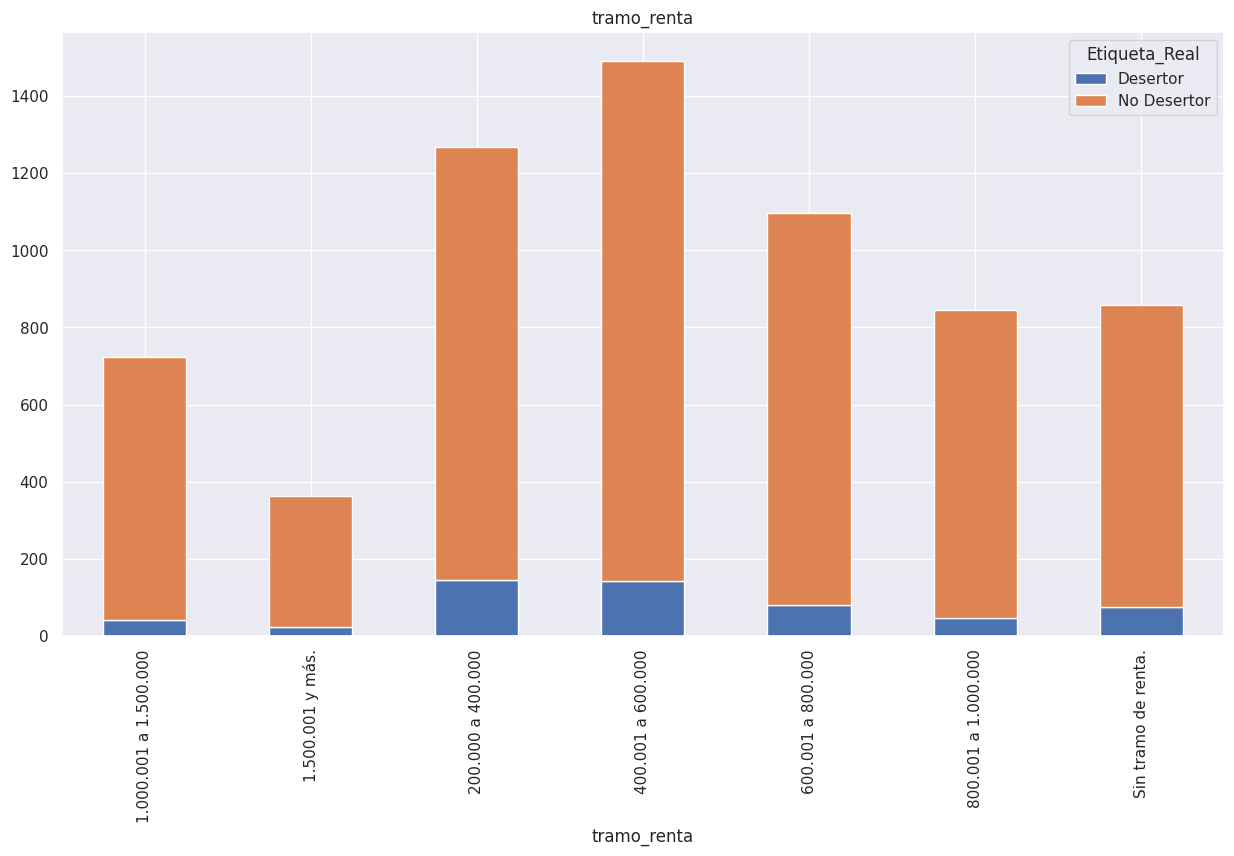

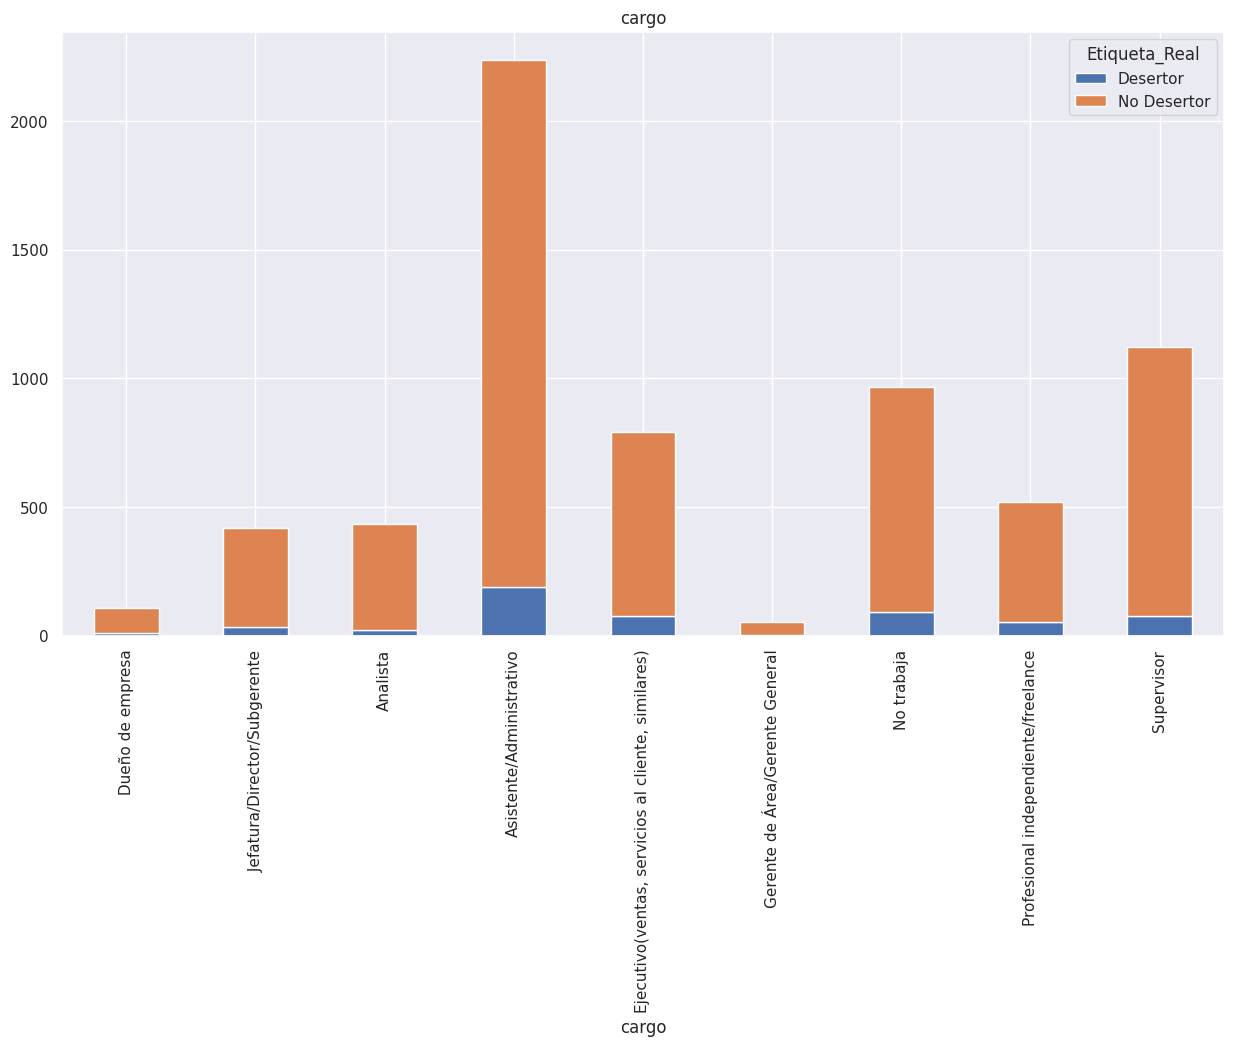

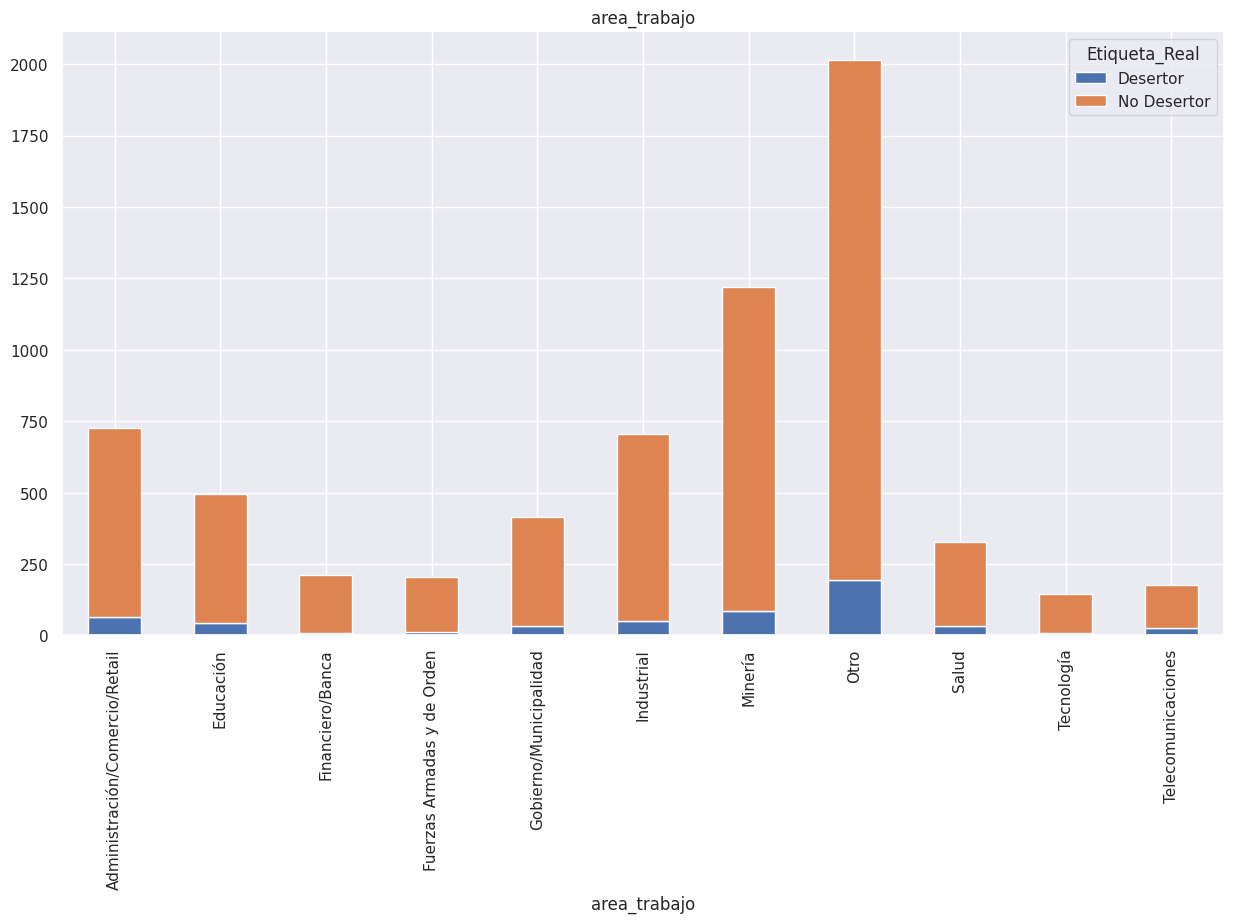

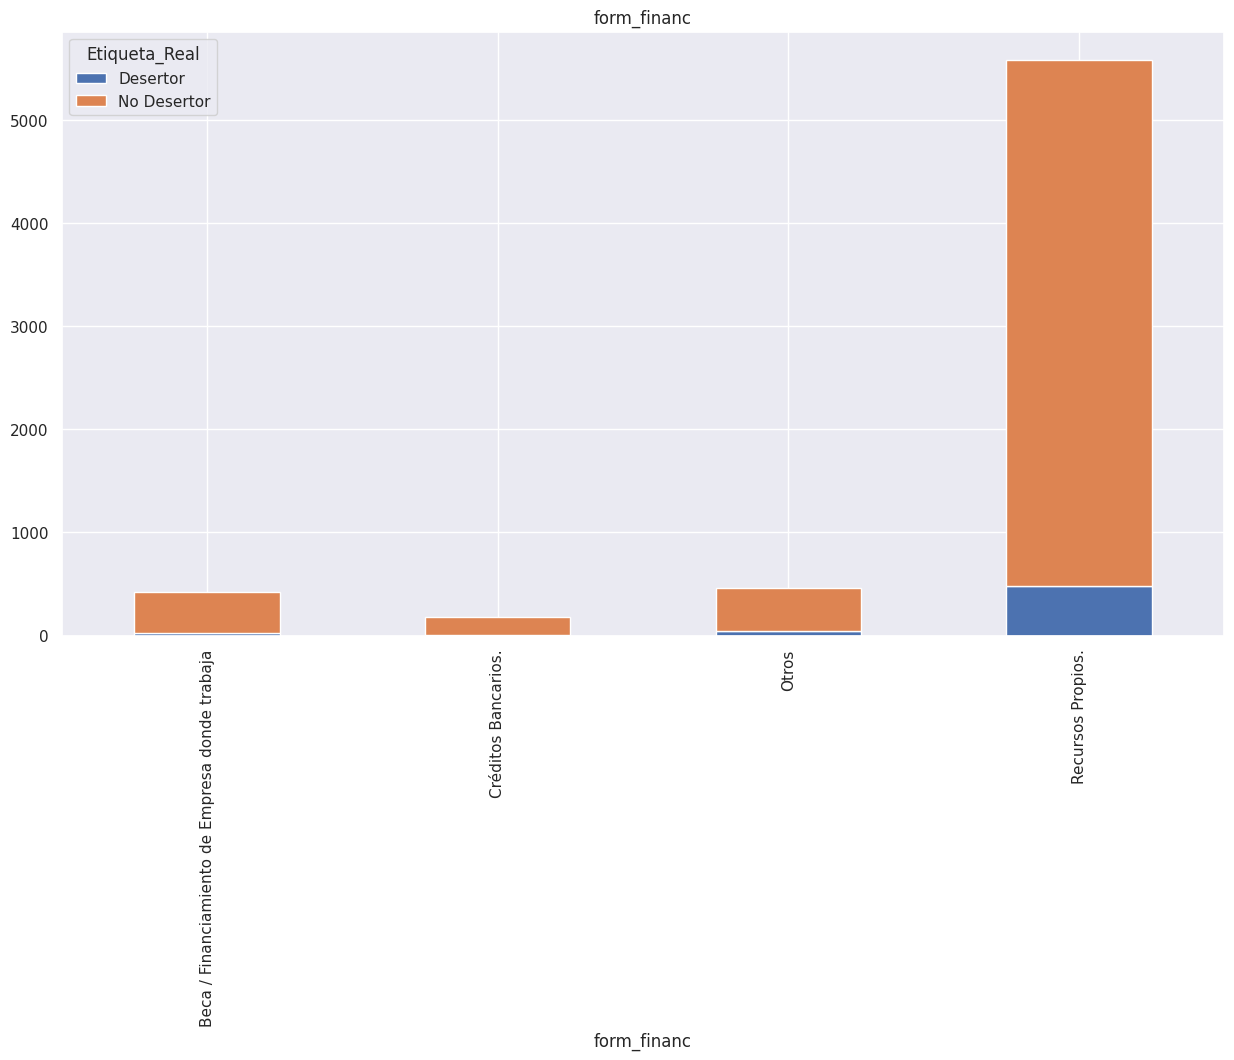

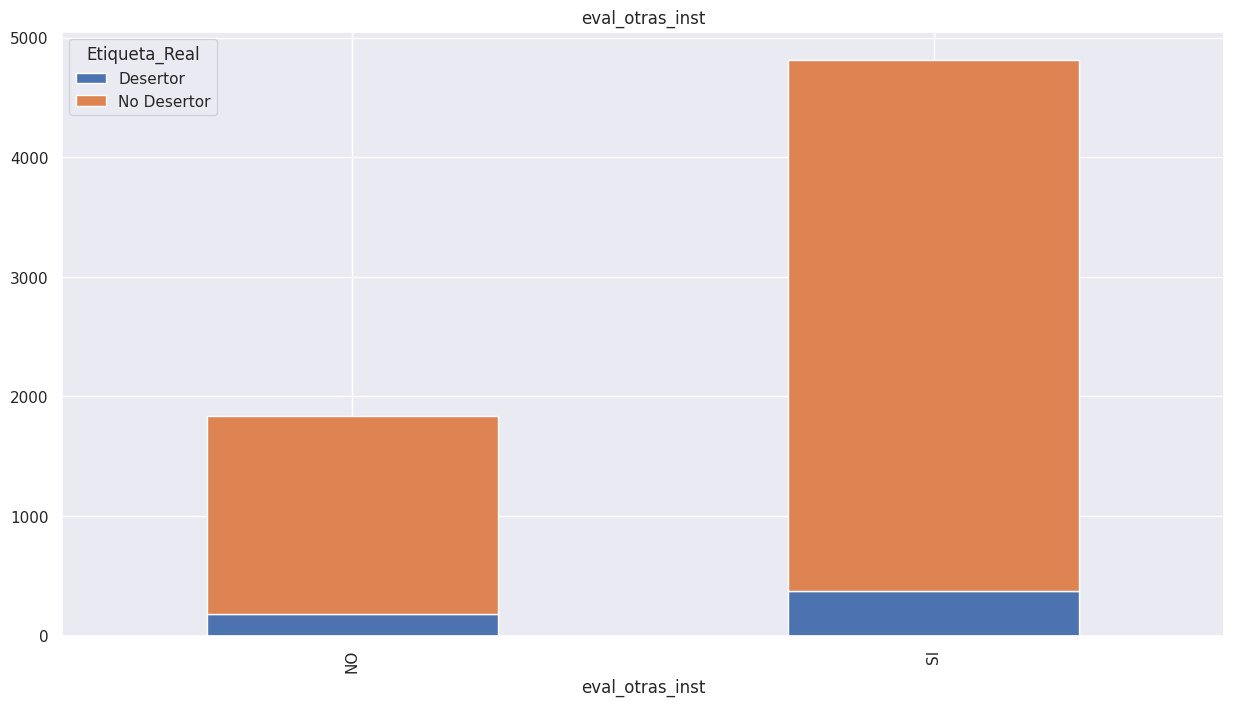

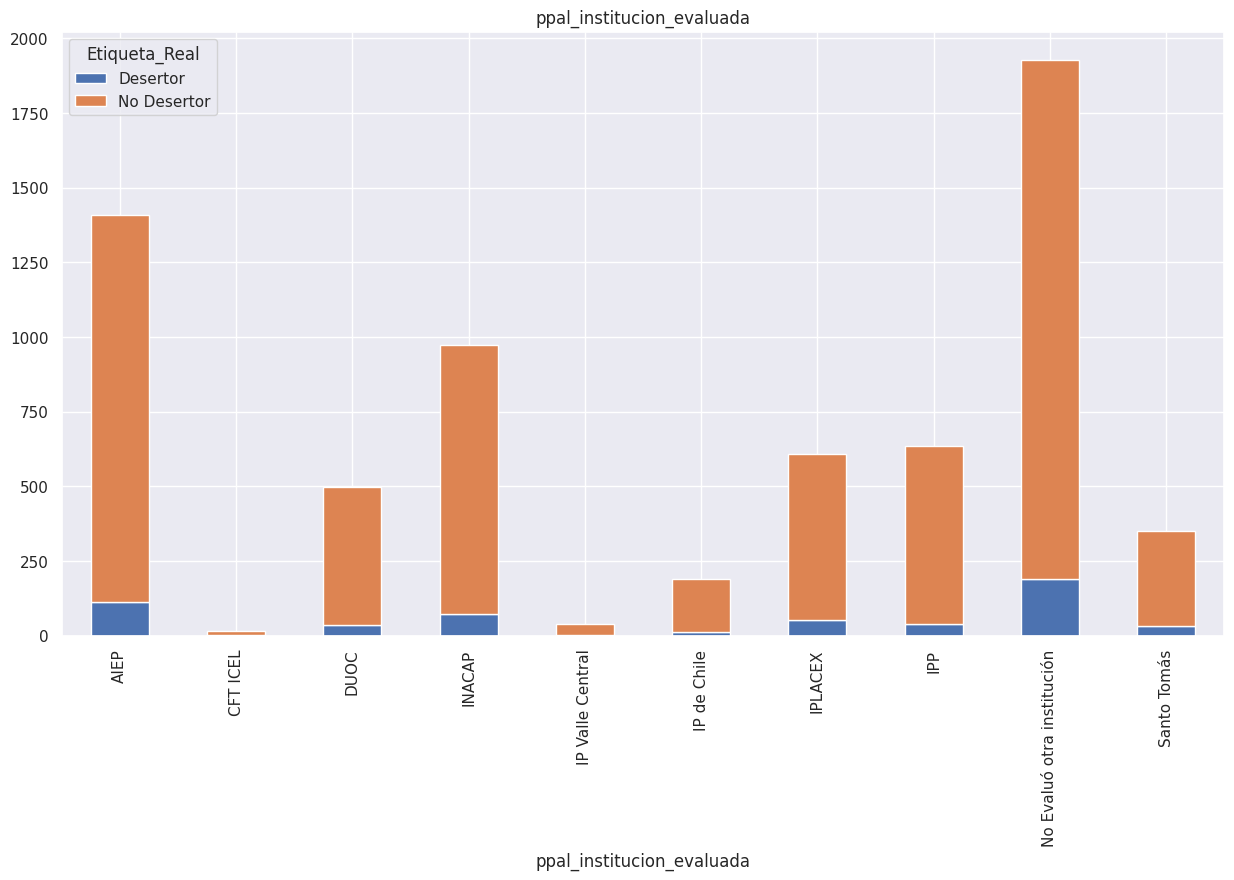

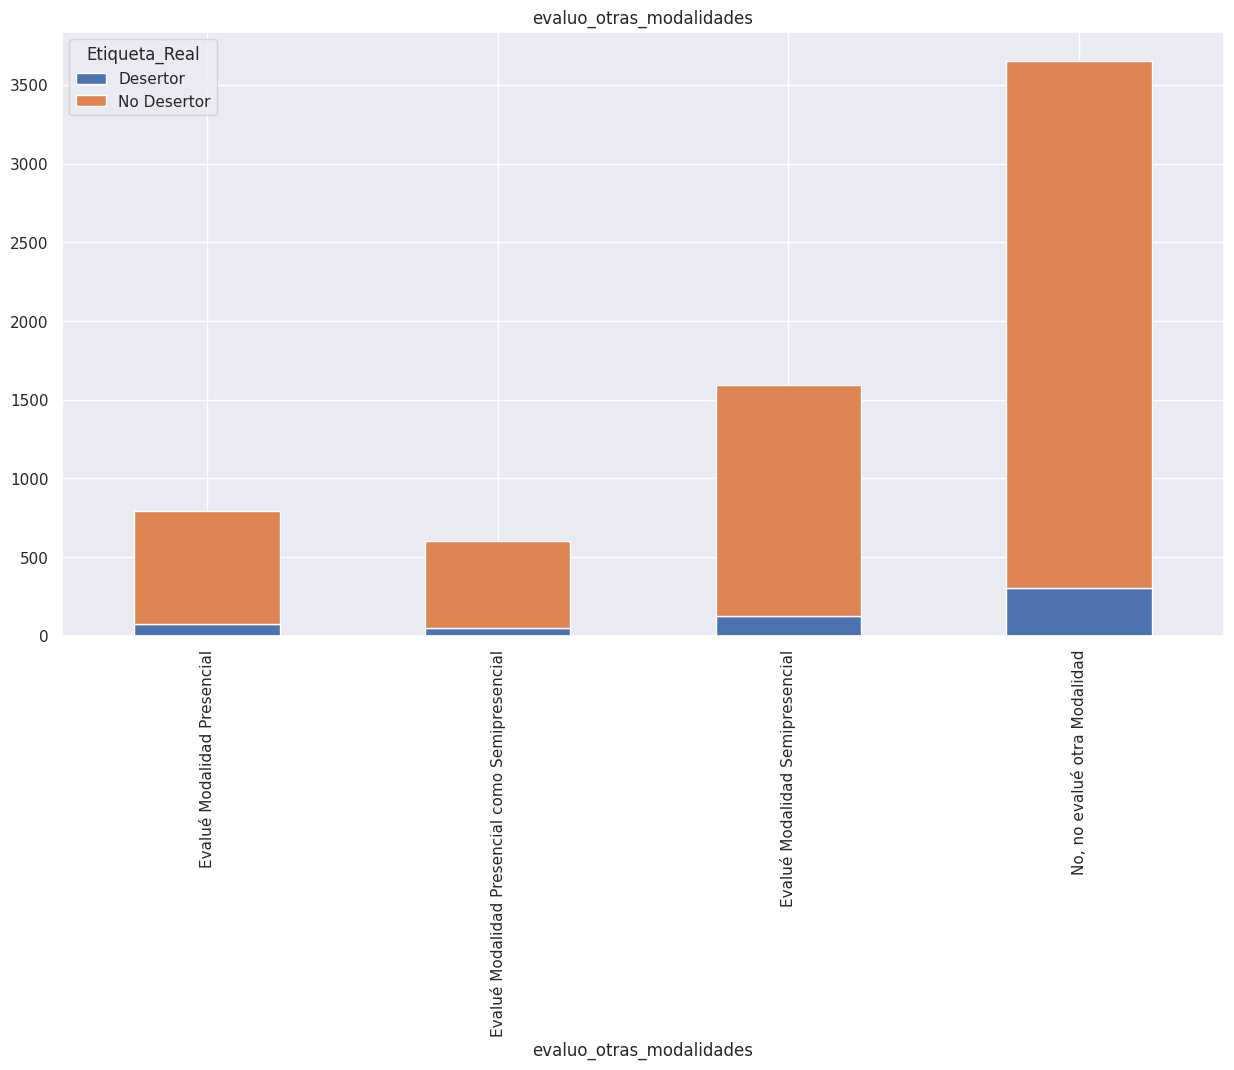

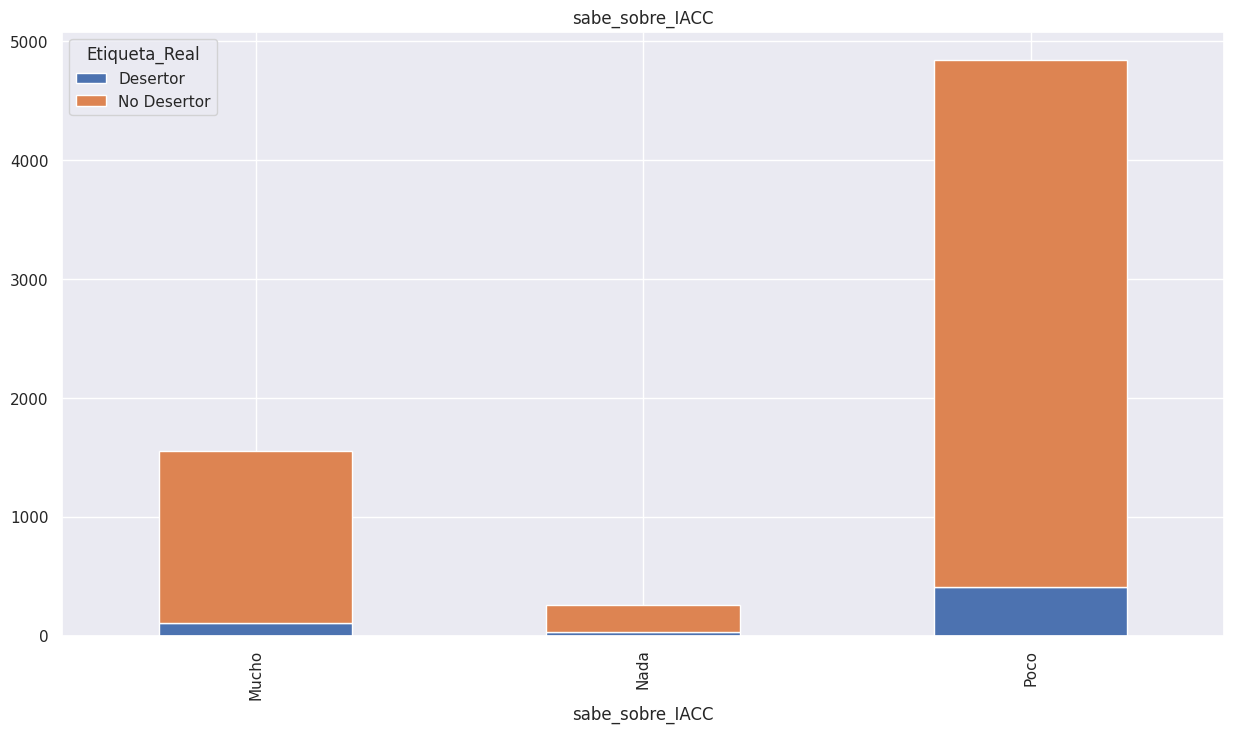

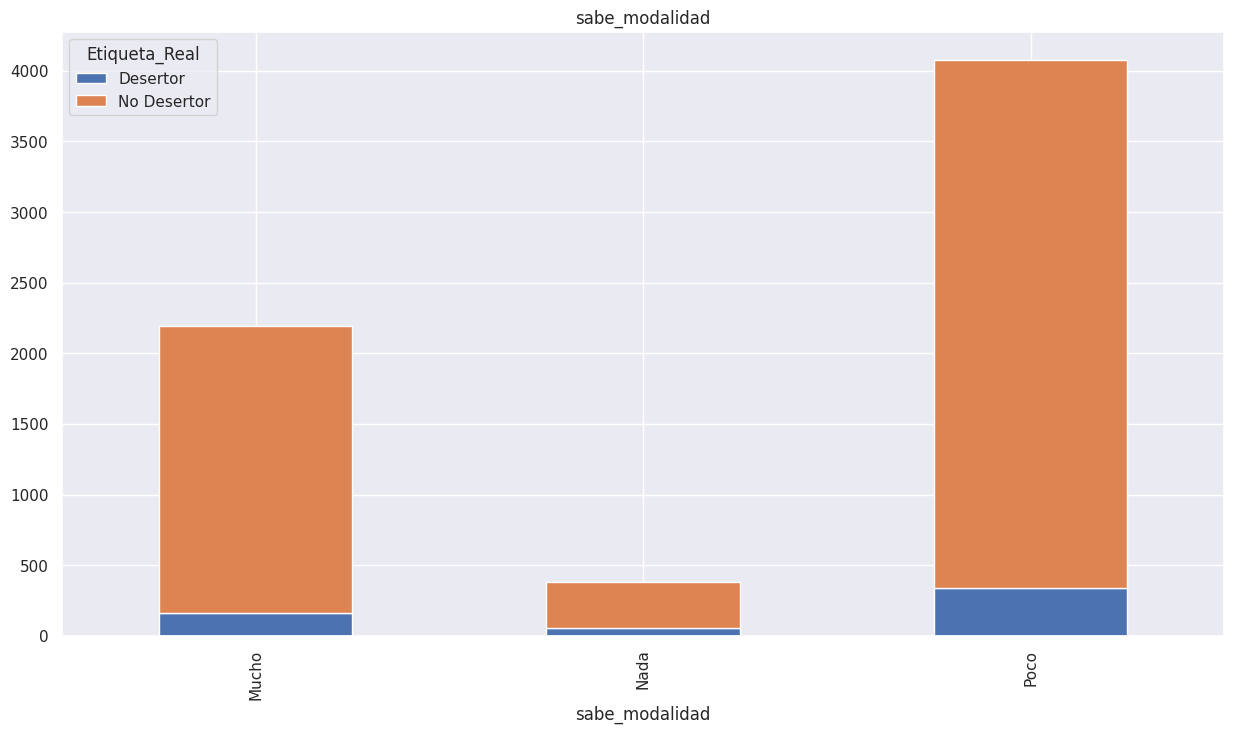

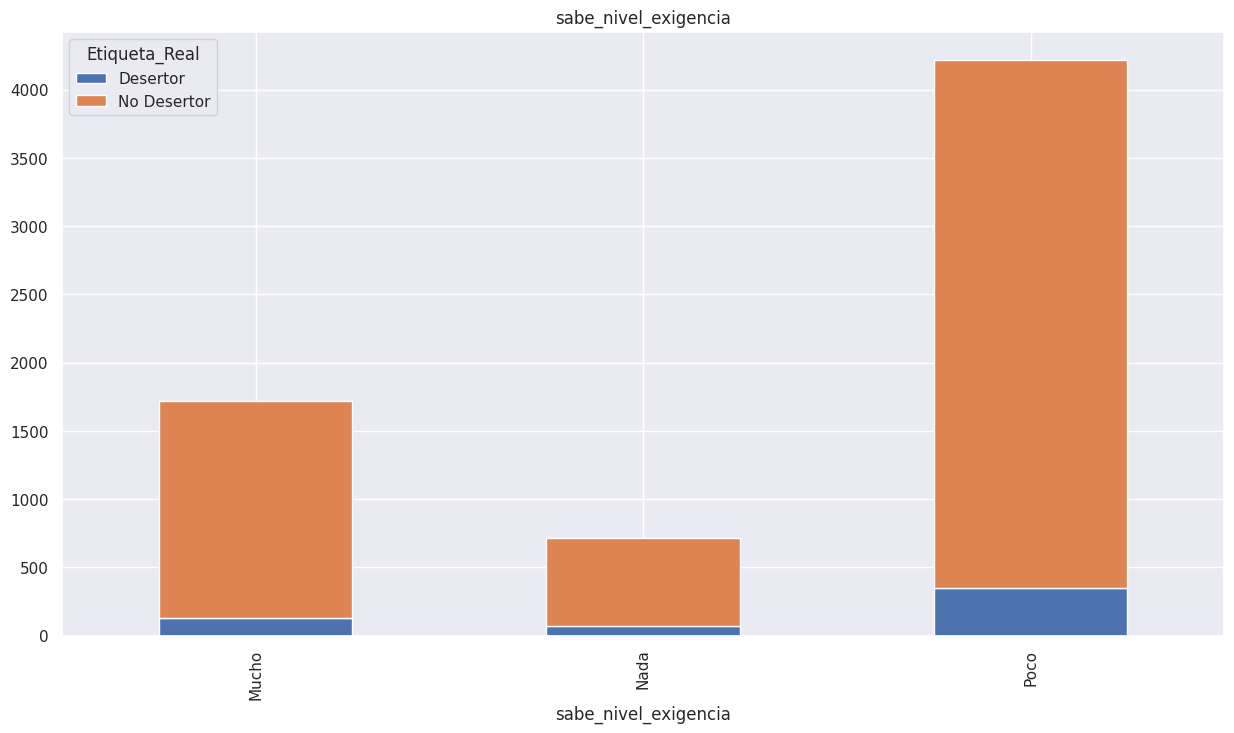

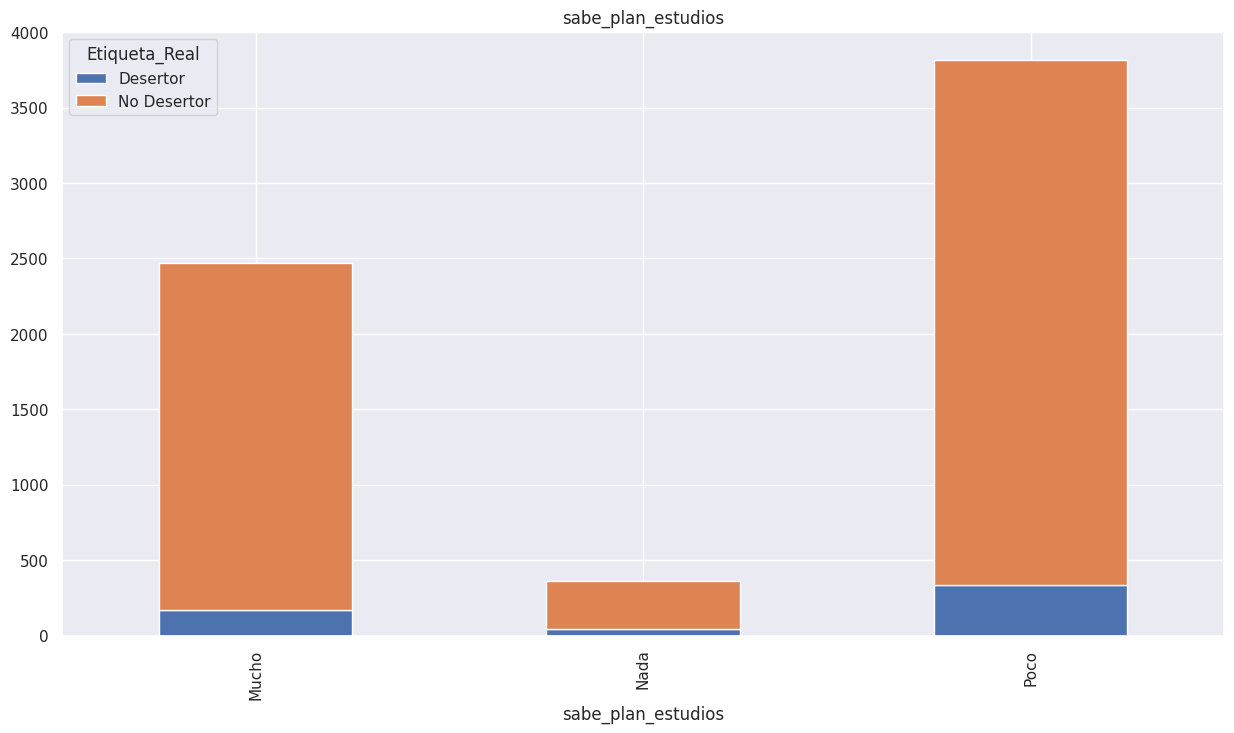

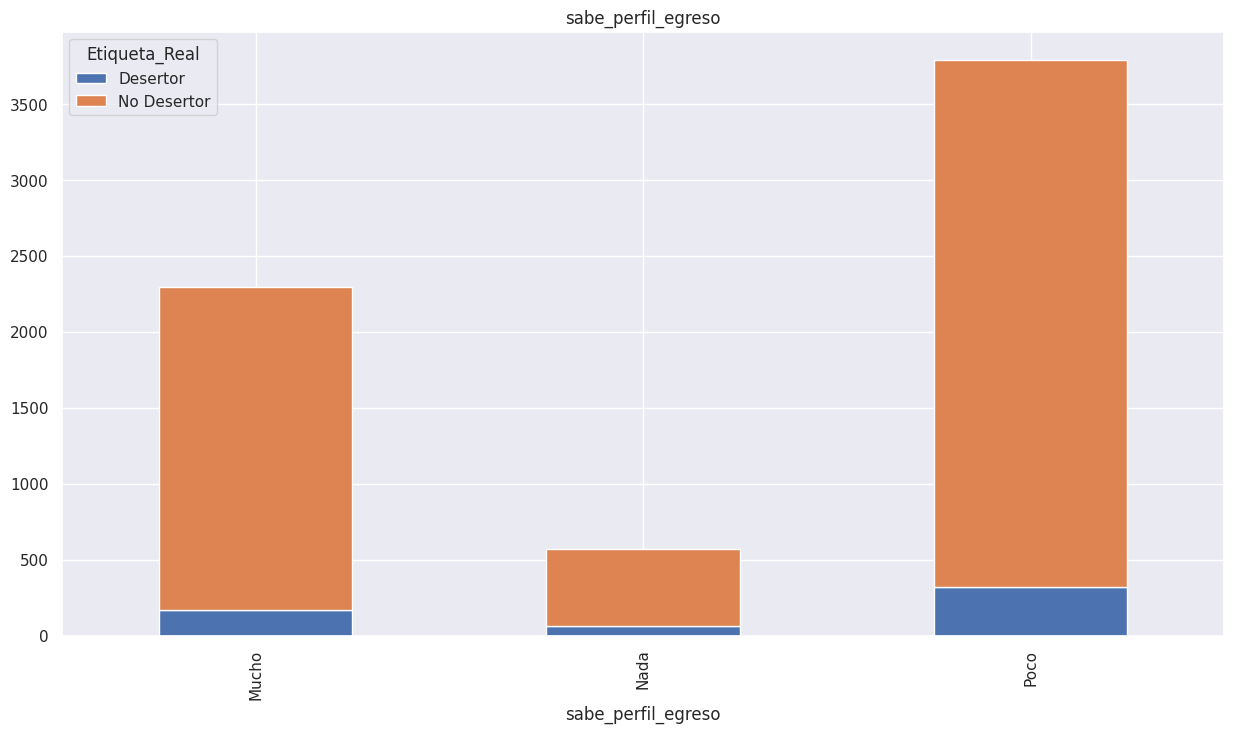

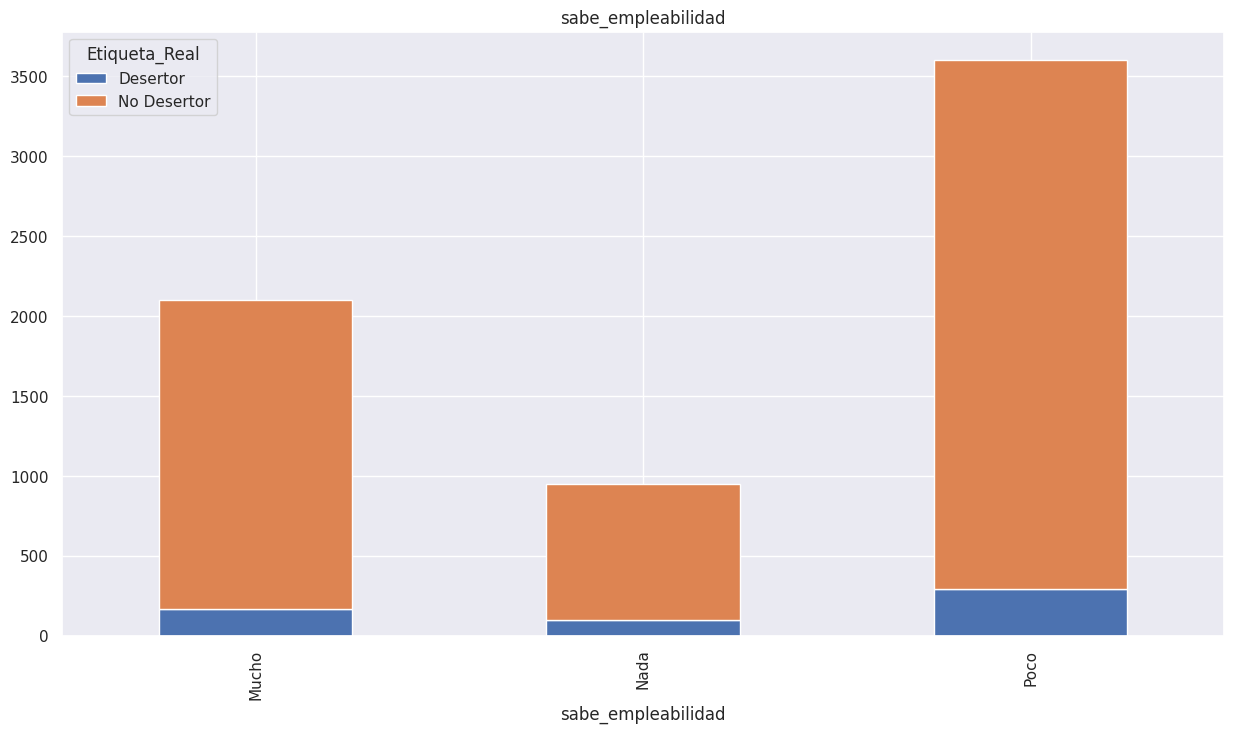

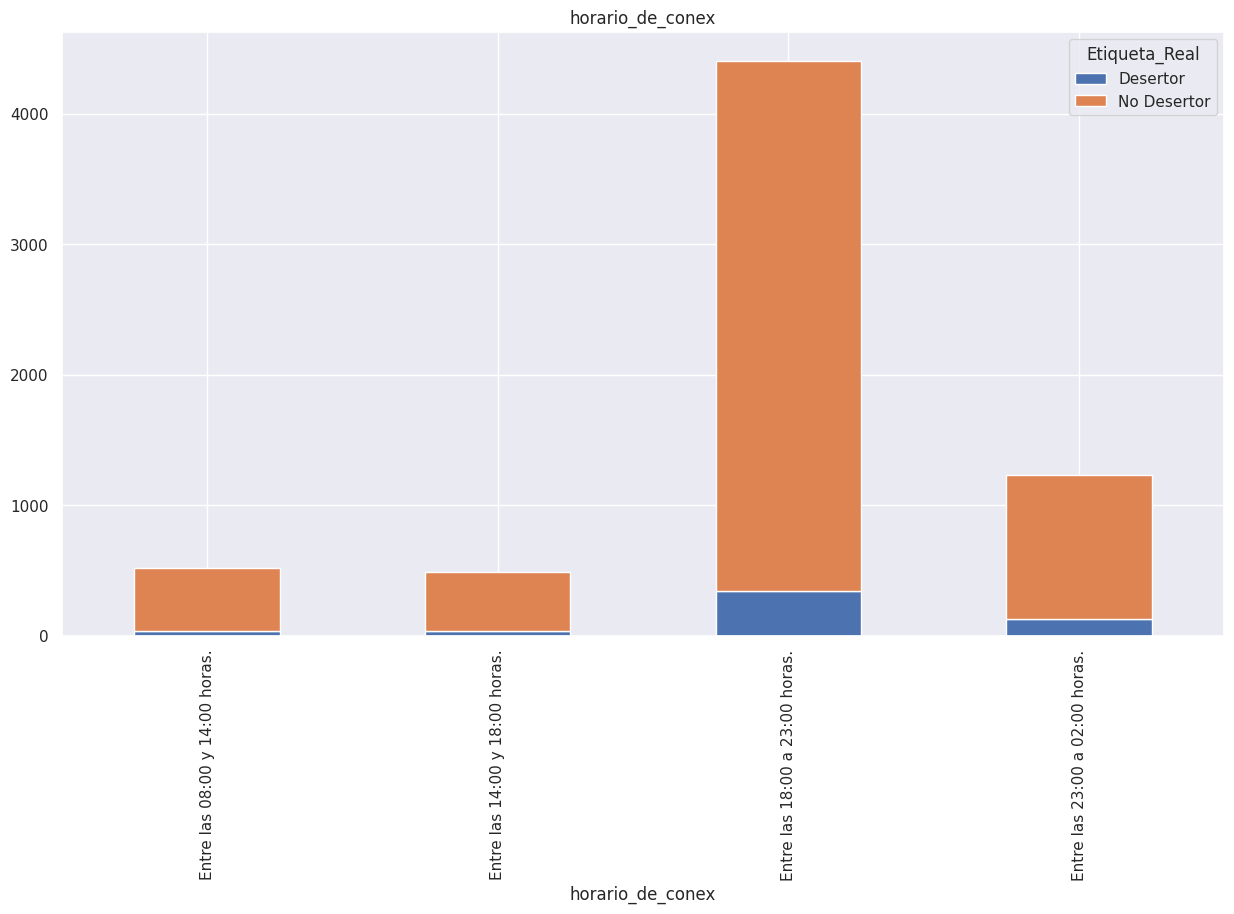

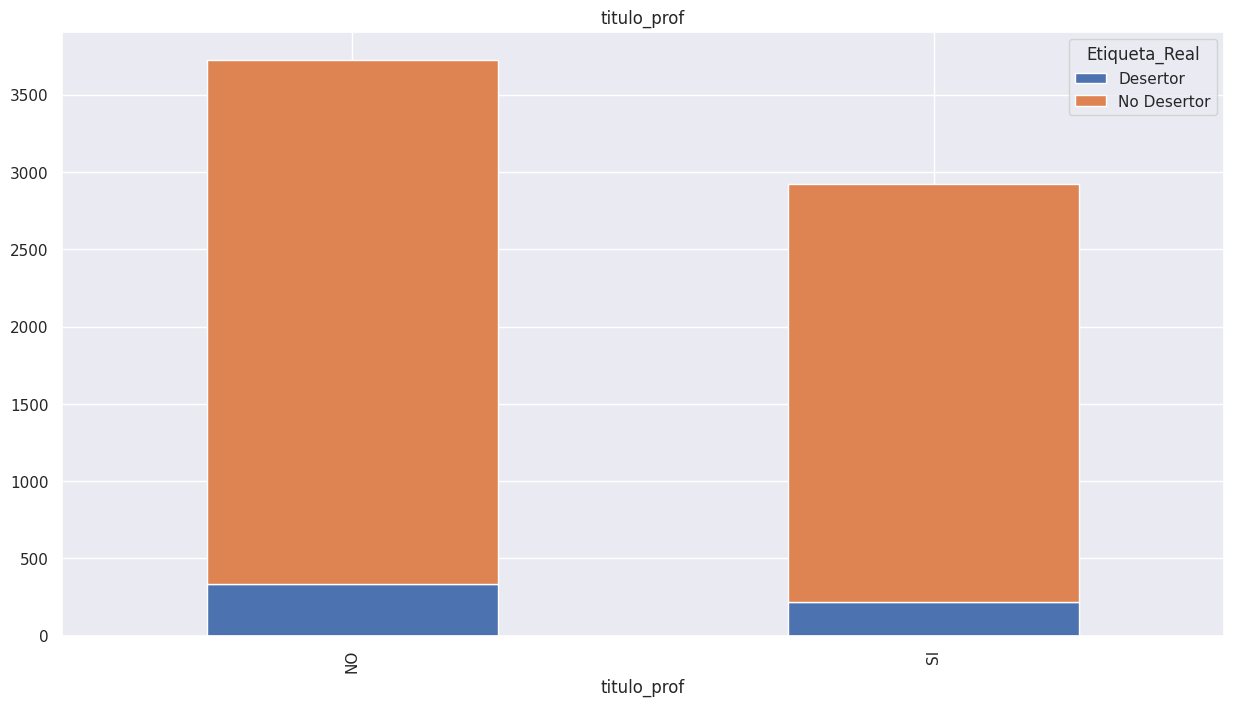

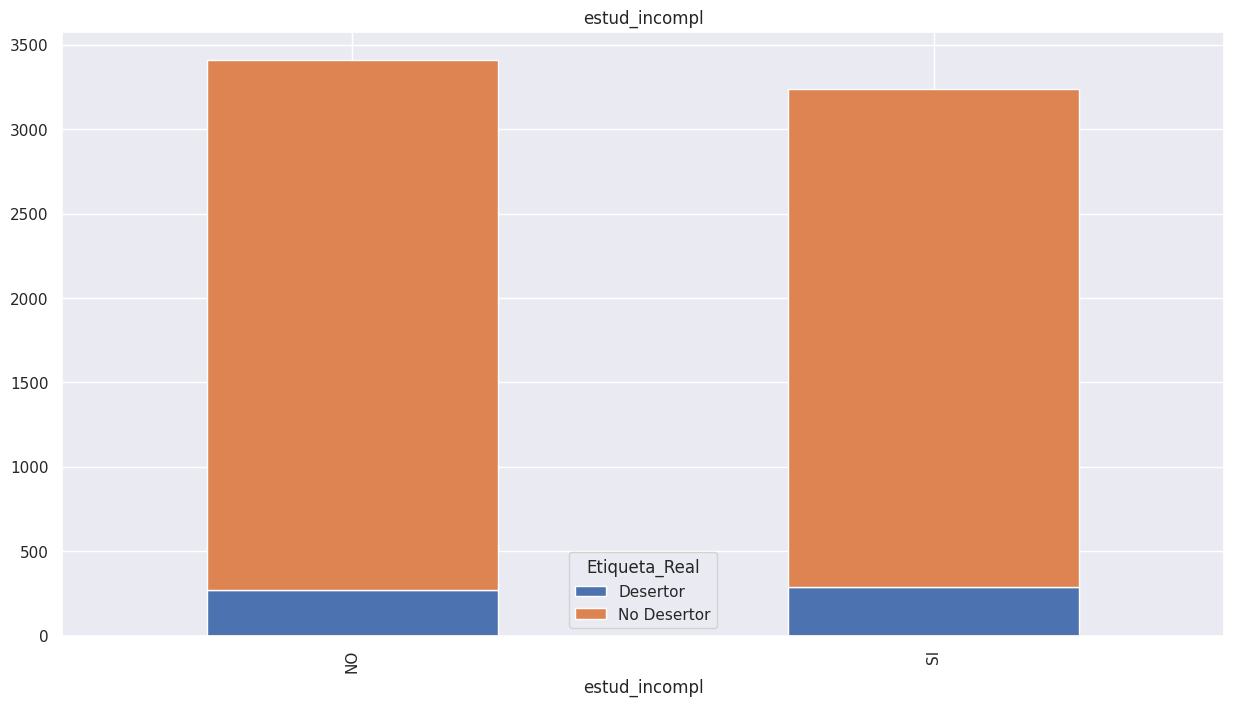

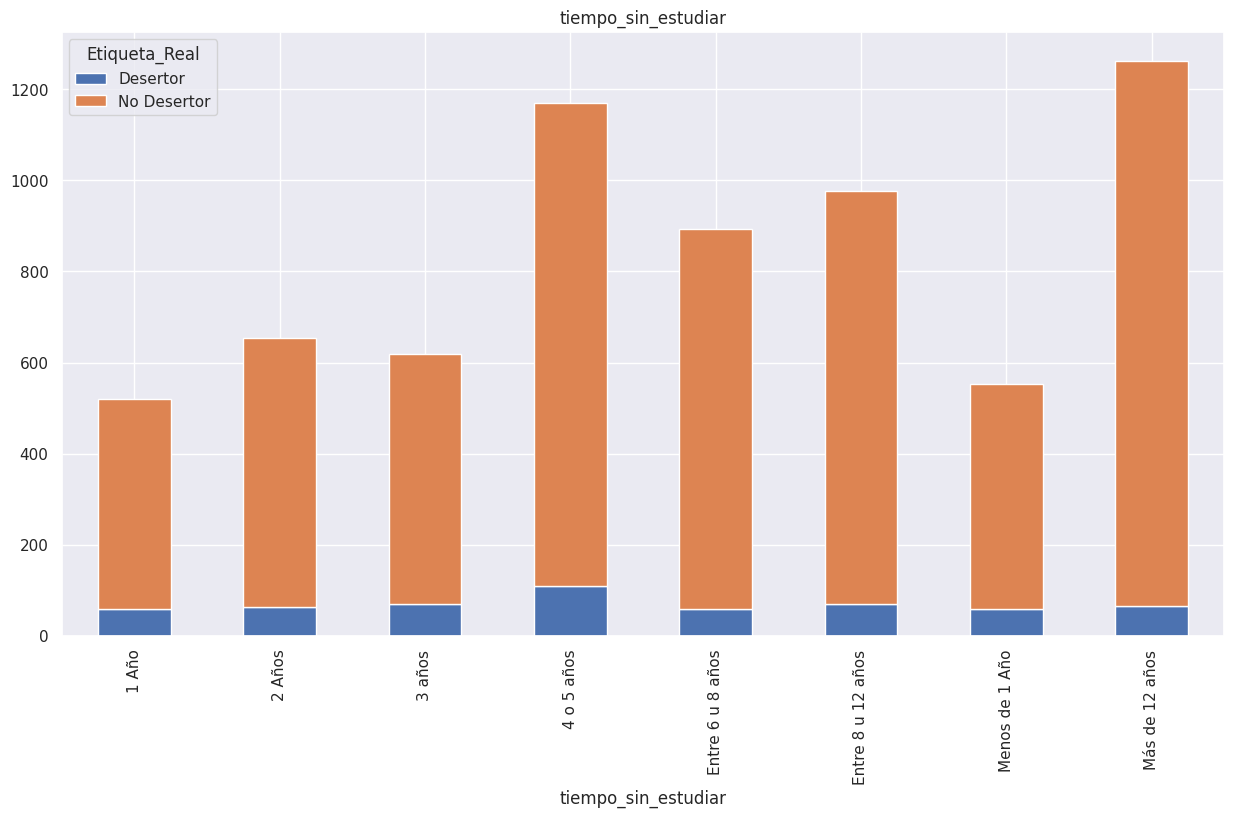

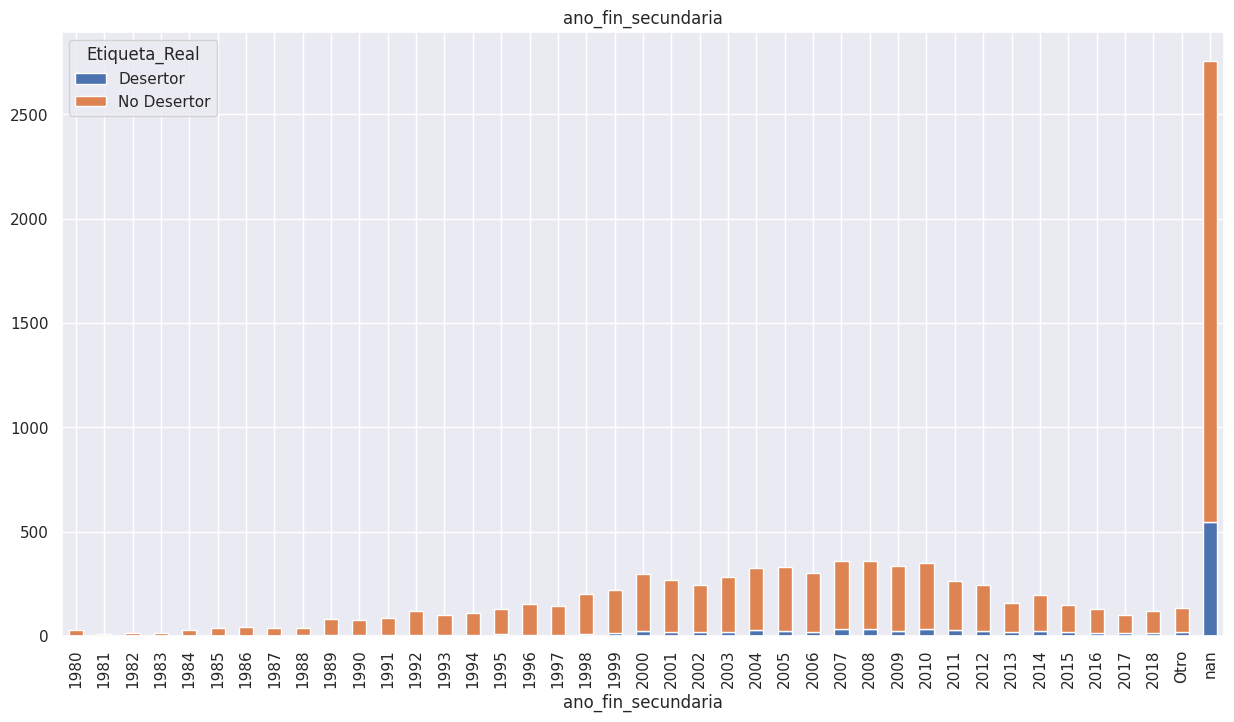

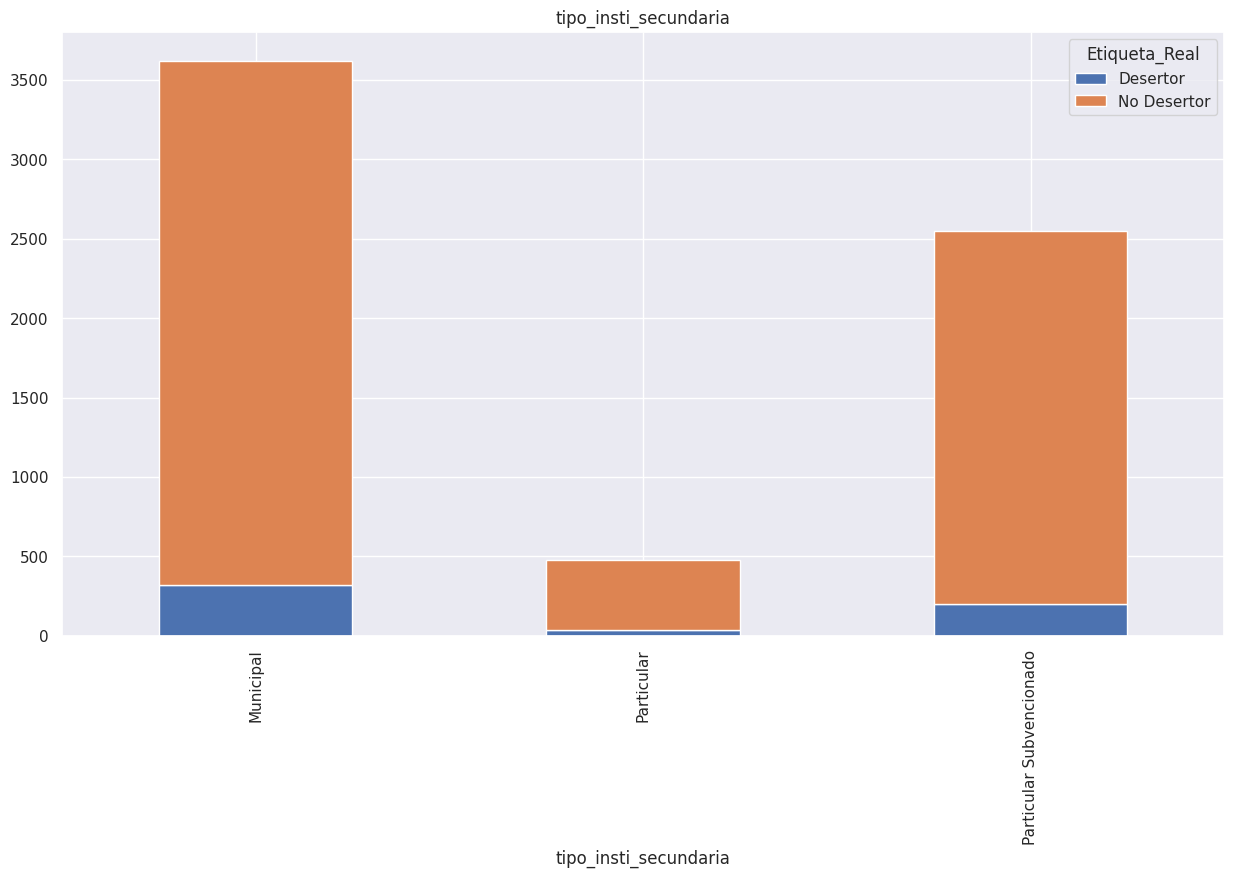

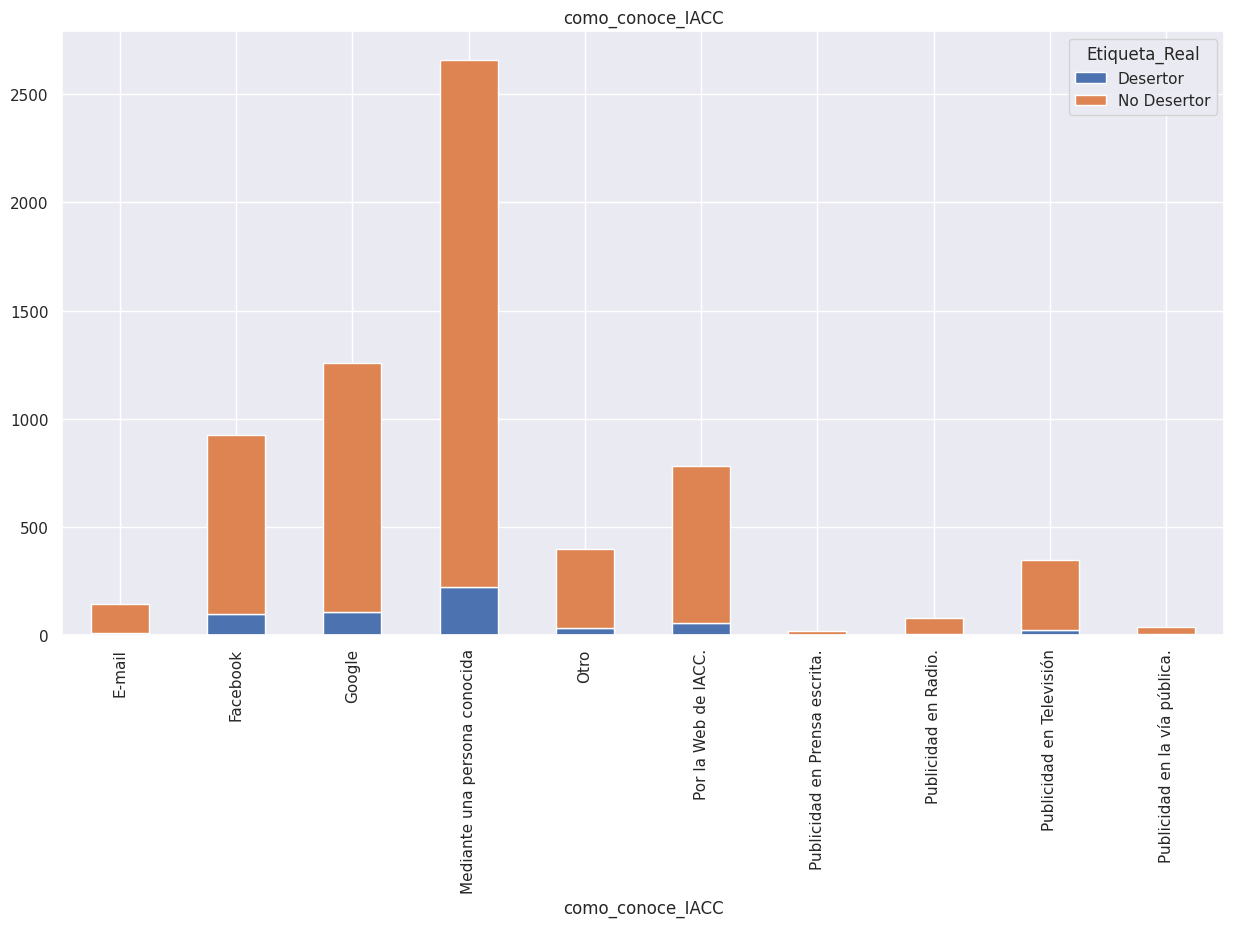

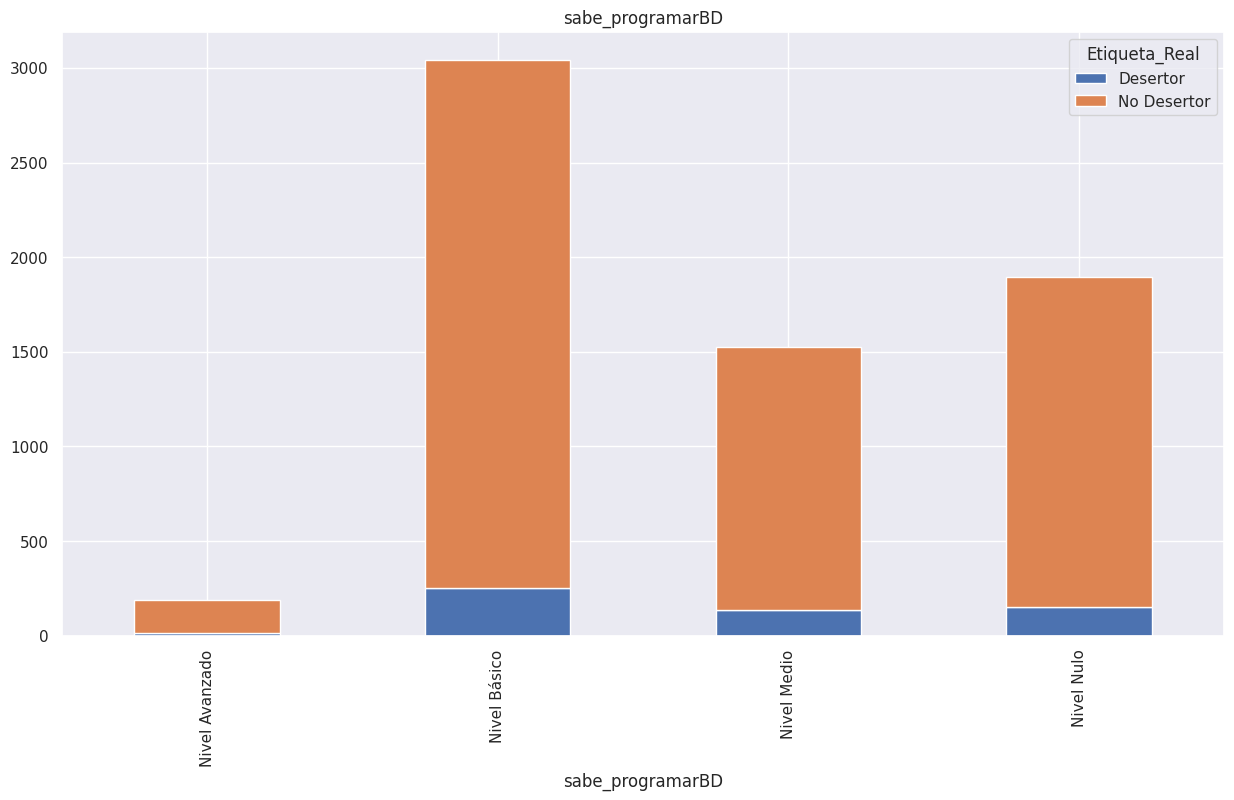

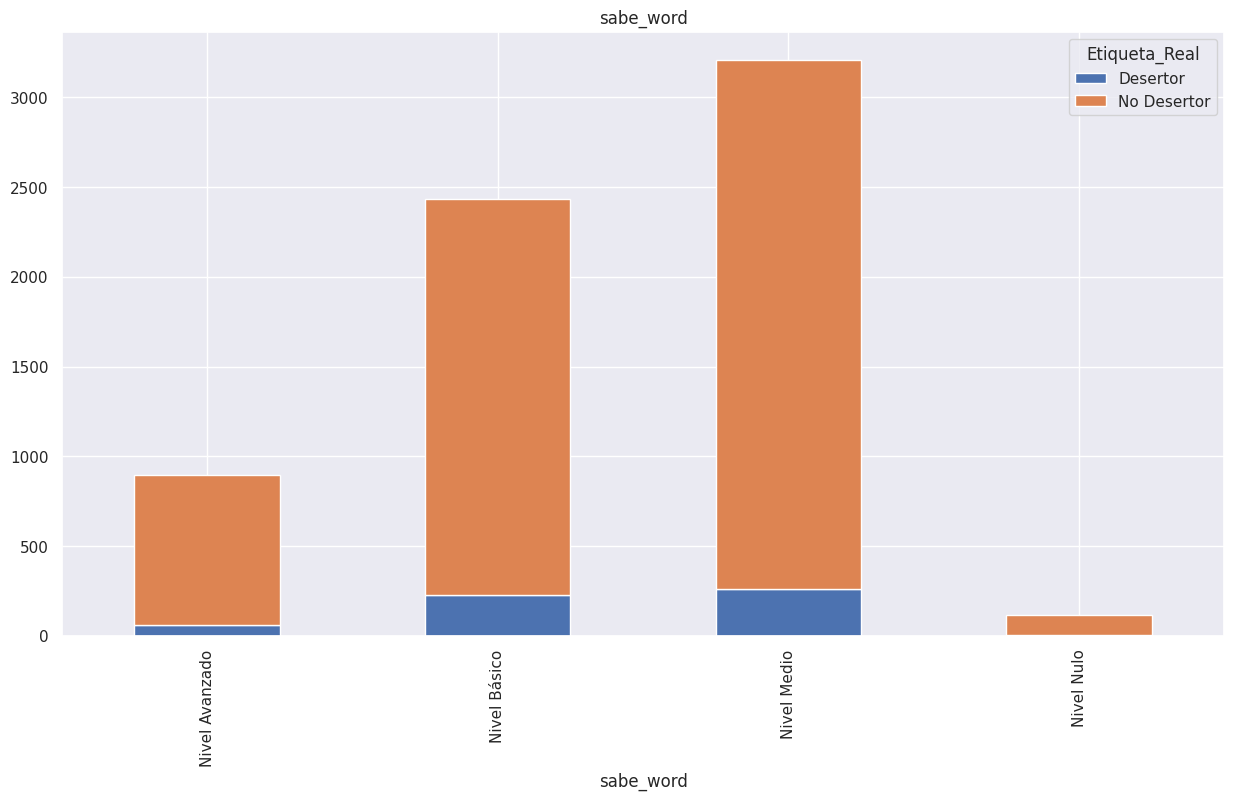

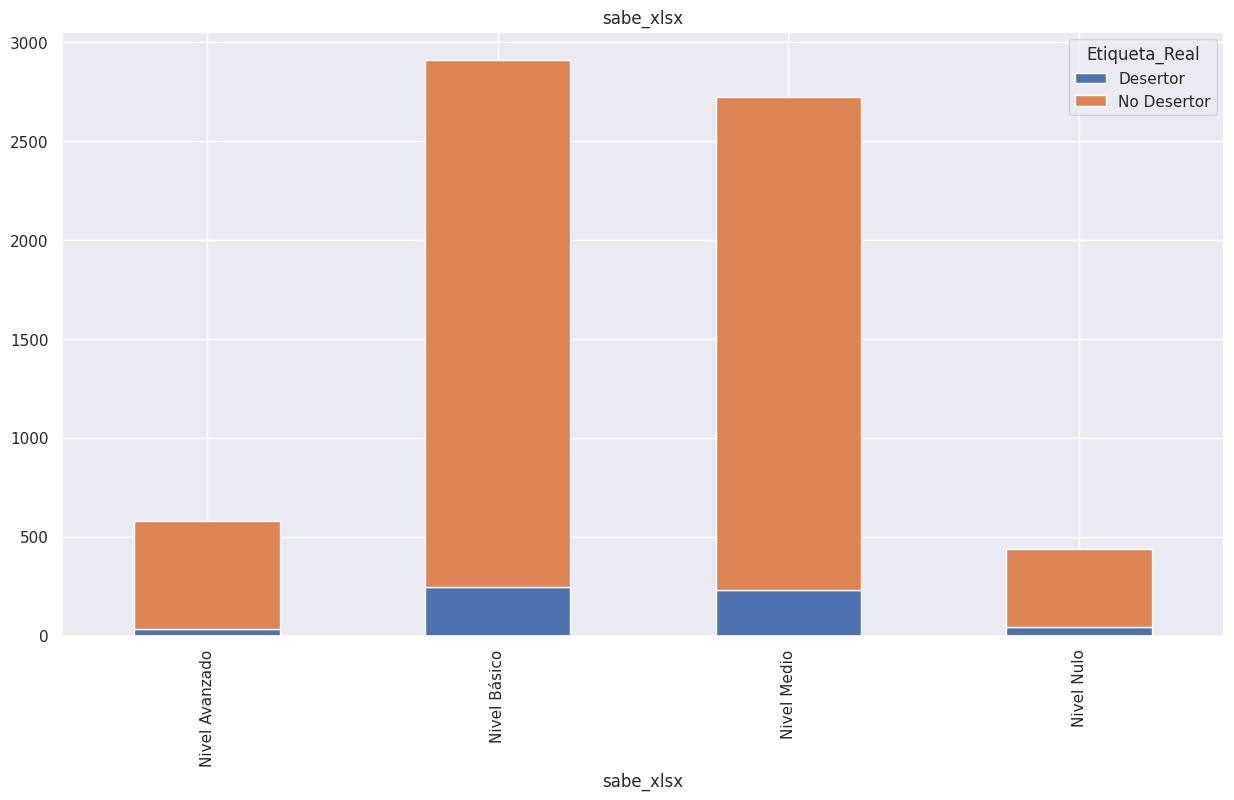

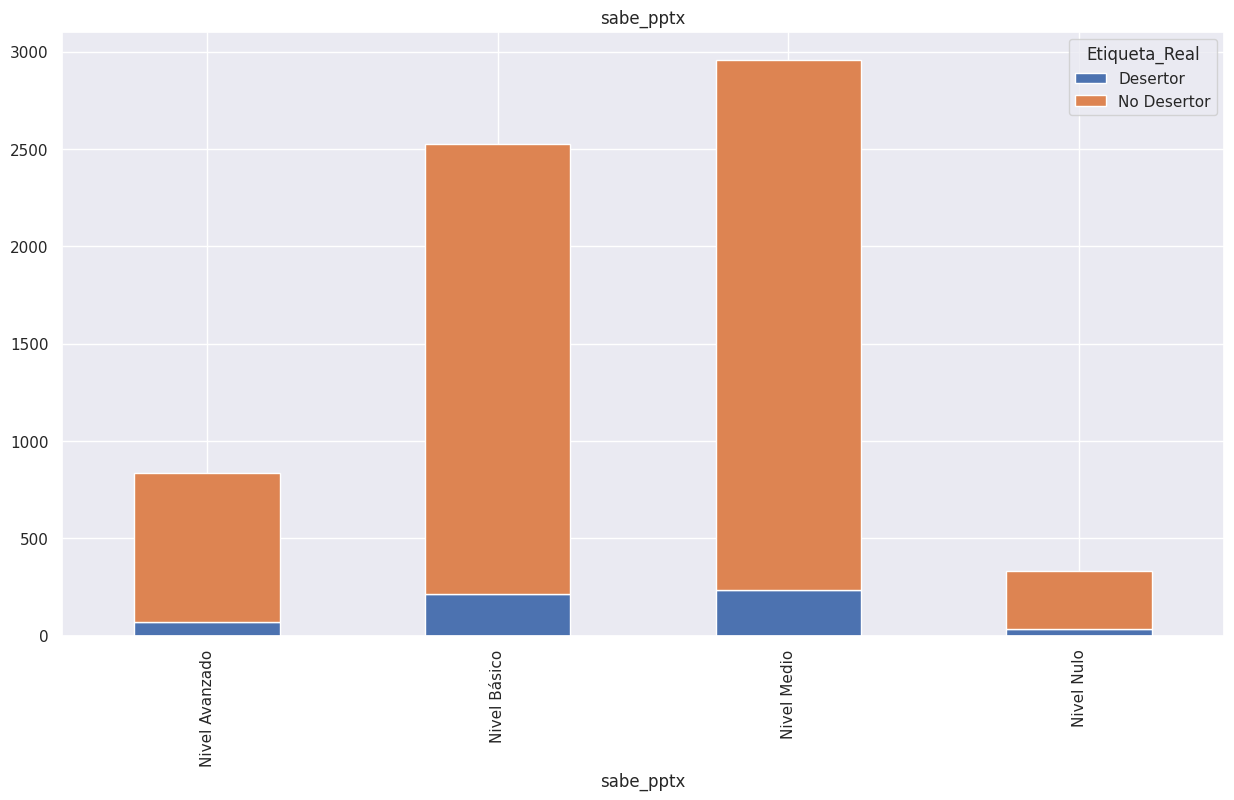

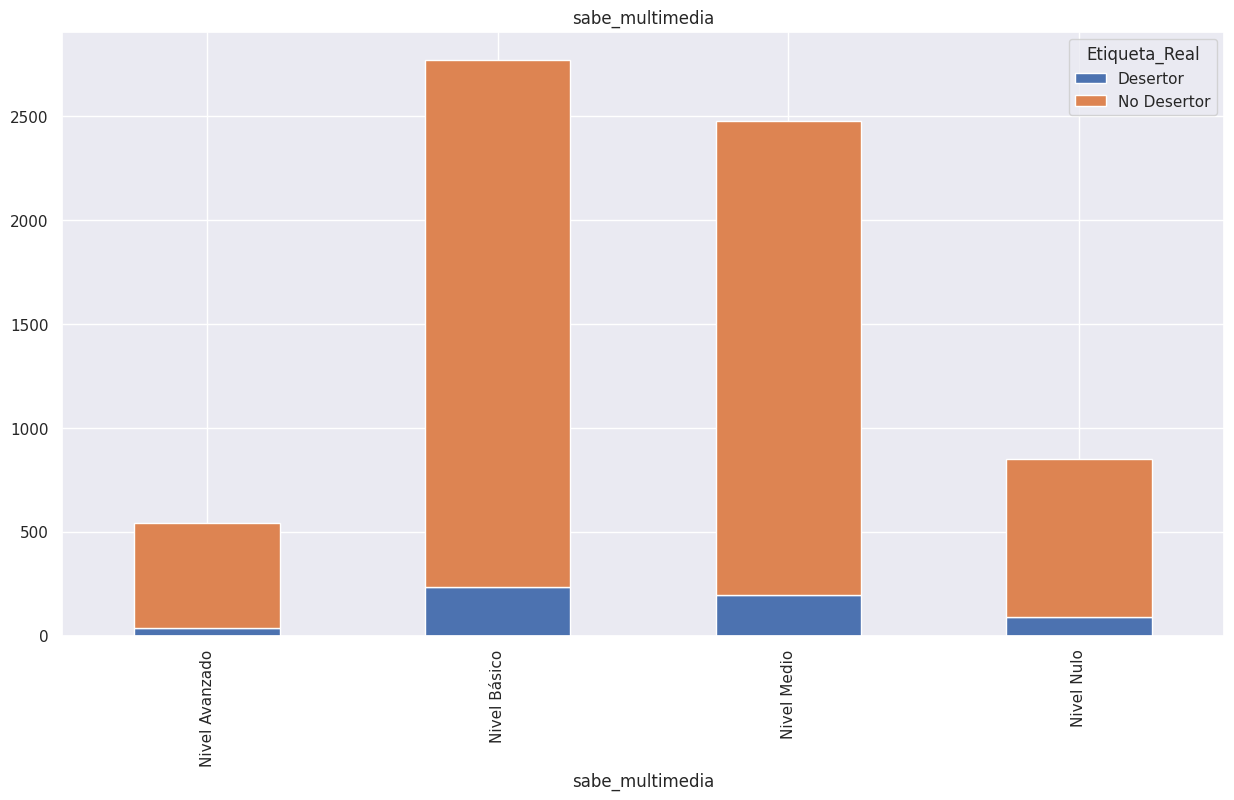

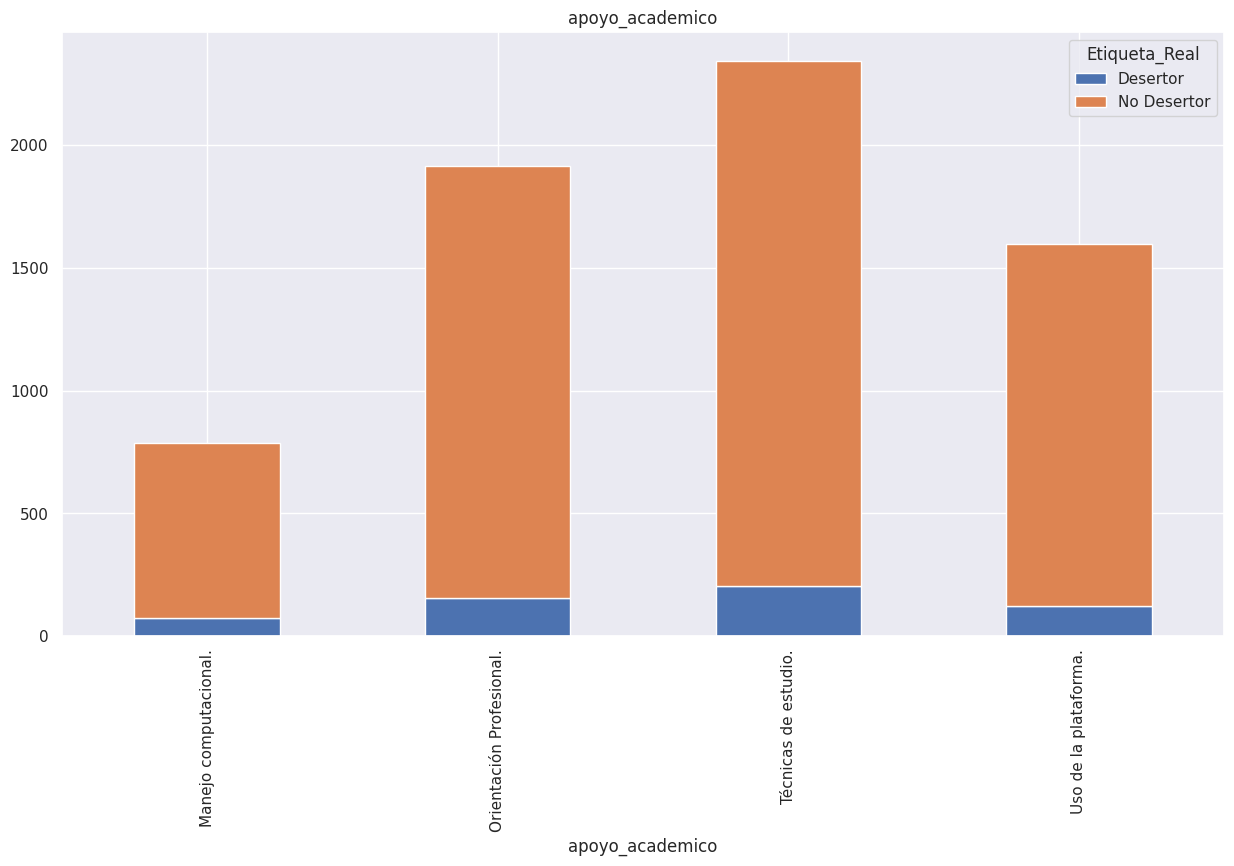

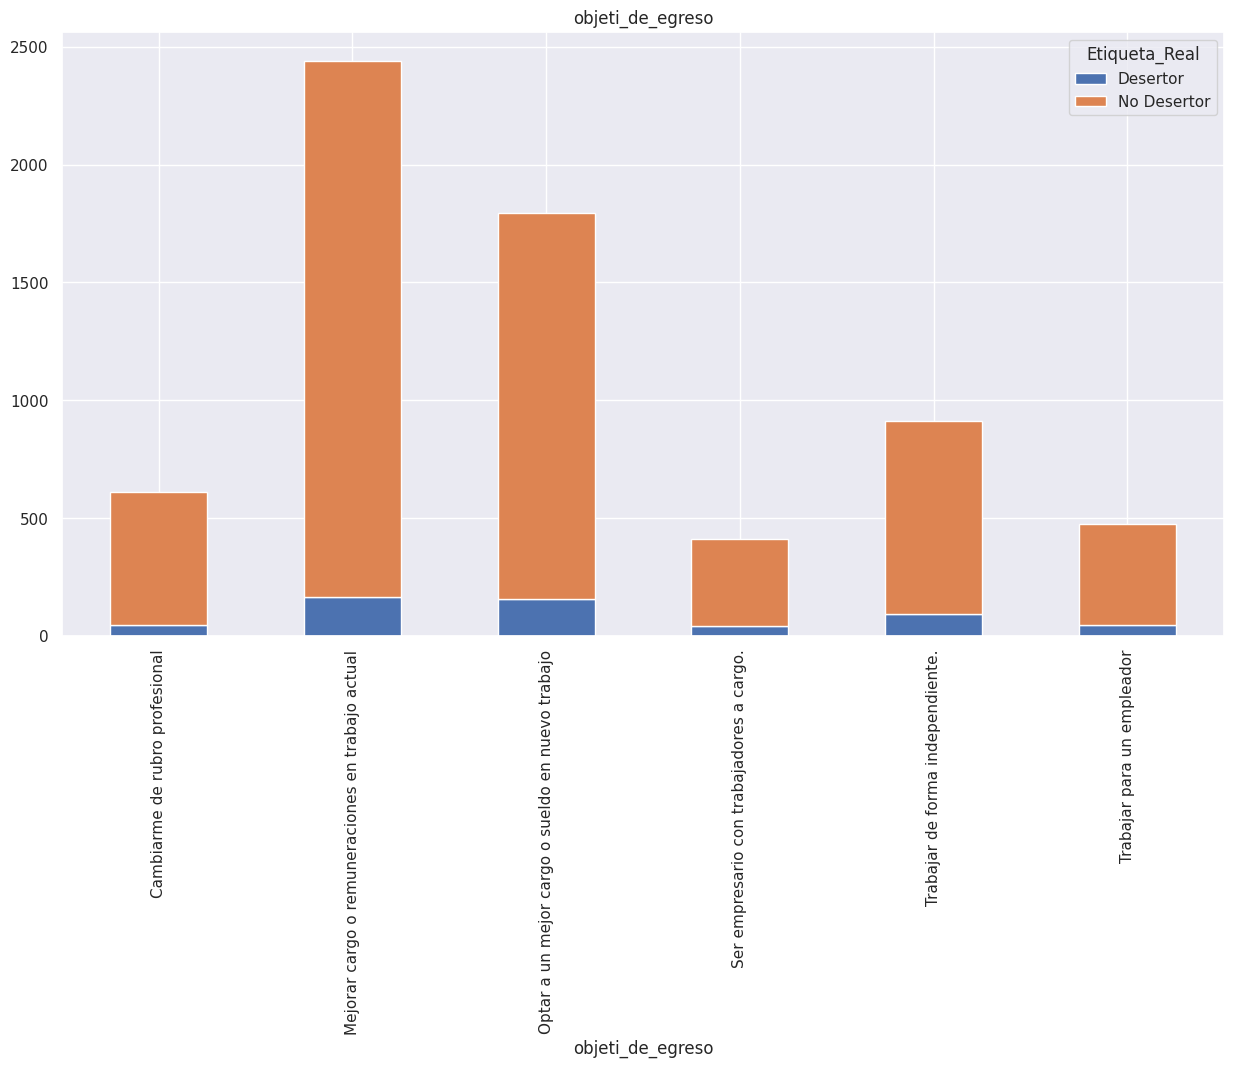

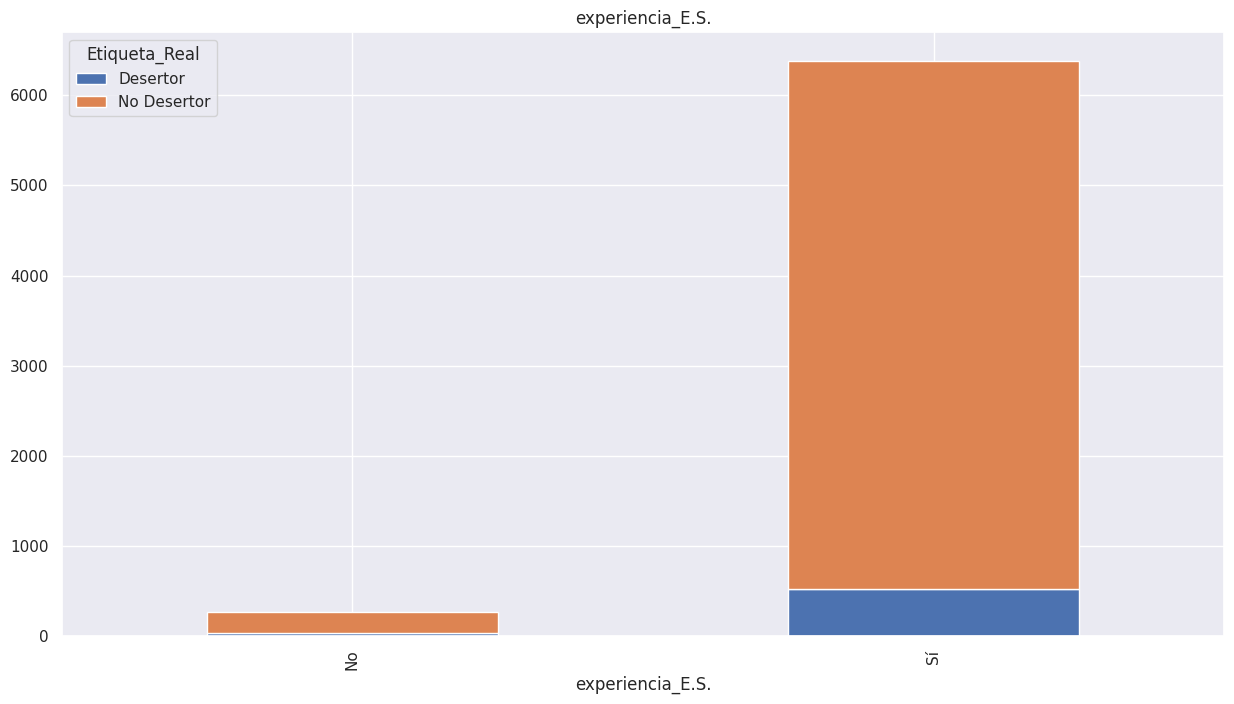

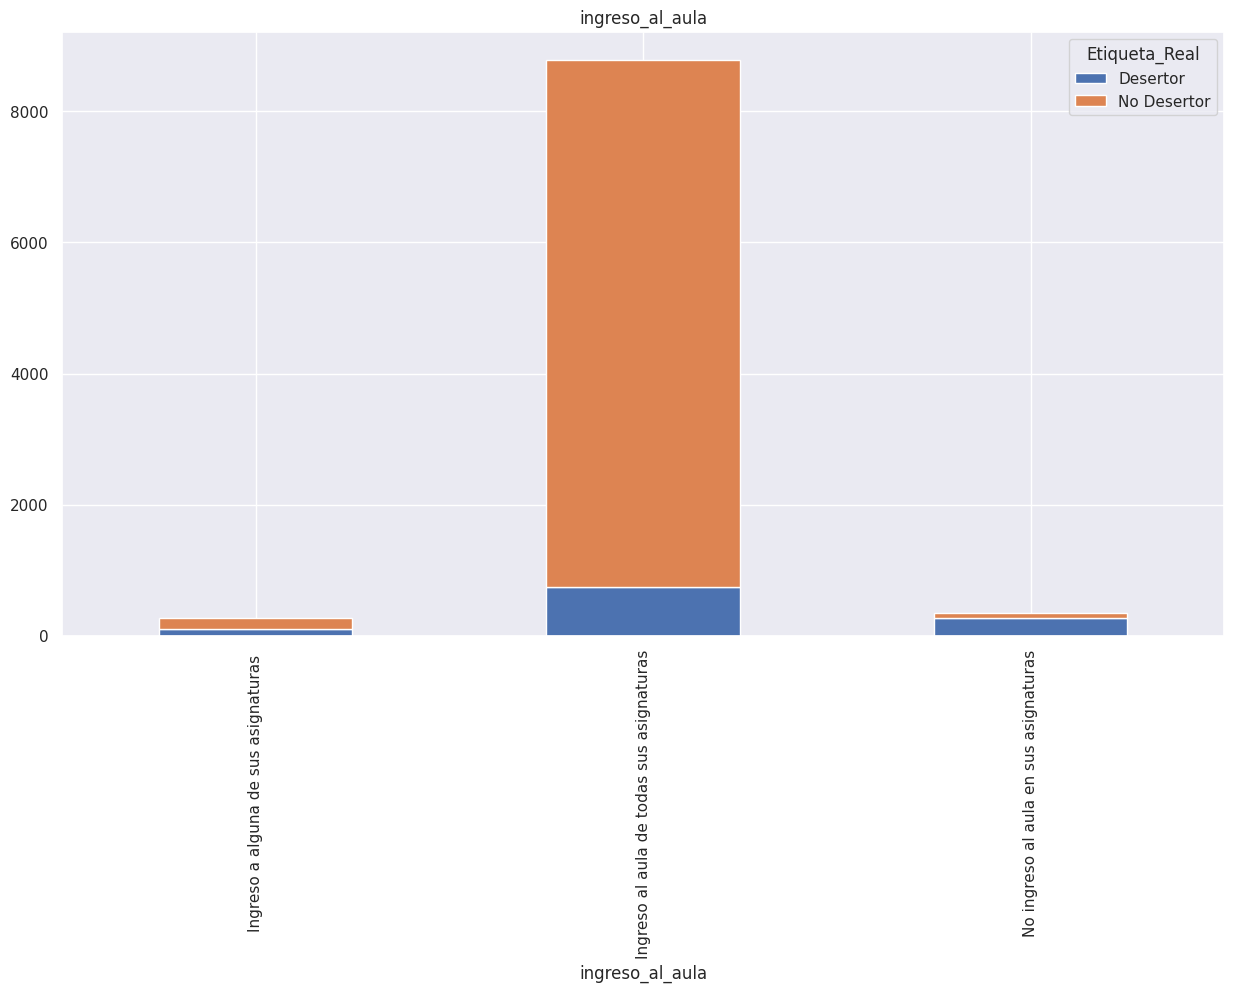

In [92]:
for i in list(df_categoricas.drop(['codcli'], axis=1).columns):
  tabla = pd.pivot_table(data=df_categoricas, values='codcli',  index =i, columns=df_categoricas['Etiqueta_Real'], aggfunc='count')
  tabla.plot(kind='bar', stacked=True, rot=90,figsize=(15, 8))
  plt.title(i)
  plt.show()
  print("\n" * 5)